# Data Science Project - Electricity Load Diagrams

## Question 1

### Import Data

###### Import necessary libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm
from fitter import Fitter, get_common_distributions, get_distributions

In [4]:
# Import dataset
data = pd.read_csv('LD2011_2014.txt', sep=';', thousands='.', decimal=',')

# Show last five rows
data.tail()

,Datetime,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
140251,2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
140252,2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
140253,2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
140254,2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
140255,2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.175240,249.158249,62.937063,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


### Data Inspection - Understanding the dataset

###### Print information about the dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Columns: 371 entries, Datetime to MT_370
dtypes: float64(370), object(1)
memory usage: 397.0+ MB


###### Print statistical description of the dataframe

In [6]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


###### Print the dimensionality of the dataframe

In [7]:
data.shape

(140256, 371)

###### Check for nulls (we observe that there aren't any null values in the dataframe)

In [8]:
# See how many null values are there in each column
data.isna().sum()

Datetime    0
MT_001      0
MT_002      0
MT_003      0
MT_004      0
           ..
MT_366      0
MT_367      0
MT_368      0
MT_369      0
MT_370      0
Length: 371, dtype: int64

### Data Preparation

###### We observe that datetime column is an object type column, so we convert it to datetime type

In [9]:
data.dtypes

Datetime     object
MT_001      float64
MT_002      float64
MT_003      float64
MT_004      float64
             ...   
MT_366      float64
MT_367      float64
MT_368      float64
MT_369      float64
MT_370      float64
Length: 371, dtype: object

In [10]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

###### Split datetime into: full date, day, month, year and time columns and convert necessary columns to datetime

In [11]:
data['Full Date'] = [d.date() for d in data['Datetime']]
data['Time'] = [d.time() for d in data['Datetime']]
data['Year'] = data['Datetime'].dt.year
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month

# Drop datetime (it is more preferable to have the time seperately since we are hourly based working)
data = data.drop(columns=['Datetime'])

# Convert Full Date column into datetime
data['Full Date'] = pd.to_datetime(data['Full Date'])

###### Get the month and day names for each record

In [12]:
data['Day Name'] = data['Full Date'].dt.day_name()
data['Month Name'] = data['Full Date'].dt.month_name()

In [13]:
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_368,MT_369,MT_370,Full Date,Time,Year,Day,Month,Day Name,Month Name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2011-01-01,00:15:00,2011,1,1,Saturday,January
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2011-01-01,00:30:00,2011,1,1,Saturday,January
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2011-01-01,00:45:00,2011,1,1,Saturday,January
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2011-01-01,01:00:00,2011,1,1,Saturday,January
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2011-01-01,01:15:00,2011,1,1,Saturday,January


###### Cleanup: Delete values that correspond to 2011 and 2015 because values of 2011 are zeros and 2015 consists of only ONE value

In [14]:
data = data[~(data['Year'] == 2011)]
data = data[~(data['Year'] == 2015)]
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_368,MT_369,MT_370,Full Date,Time,Year,Day,Month,Day Name,Month Name
35039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,2012-01-01,00:00:00,2012,1,1,Sunday,January
35040,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,63.439065,761.730205,0.0,2012-01-01,00:15:00,2012,1,1,Sunday,January
35041,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,60.100167,702.346041,0.0,2012-01-01,00:30:00,2012,1,1,Sunday,January
35042,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,56.761269,696.480938,0.0,2012-01-01,00:45:00,2012,1,1,Sunday,January
35043,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,63.439065,693.548387,0.0,2012-01-01,01:00:00,2012,1,1,Sunday,January


### Data Visualization

- Daily grouped consumption mean of each client

In [15]:
daily_dt = data.groupby('Day Name').mean()
daily_dt = daily_dt.drop(columns=['Year', 'Day', 'Month'])

# Sort by day
new_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_dt = daily_dt.reindex(new_order, axis=0)
daily_dt

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_14016\1843804181.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_dt = data.groupby('Day Name').mean()


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Day Name,,,,,,,,,,,,,,,,,,,,,
Monday,5.206060,27.702212,4.048278,107.068861,50.245246,187.681865,5.493436,252.766965,55.759511,62.865628,...,286.292936,49352.521231,2461.080765,3881.221651,84.687546,14.896665,563.069057,139.368760,832.961073,11153.529724
Tuesday,5.589246,27.615950,3.592660,107.042834,51.037216,192.333348,5.975913,258.390031,56.375667,59.403822,...,285.044586,49792.860934,2461.933213,3887.895677,88.785304,10.932583,593.634138,159.484447,870.032836,12148.950623
Wednesday,5.692389,27.419029,3.637046,106.703271,50.468645,189.392898,6.063227,257.396372,56.435984,59.788071,...,285.003906,49902.103238,2464.842175,3915.330655,87.586538,15.274682,587.329021,157.737352,860.881892,12070.831899
Thursday,5.474580,27.227917,3.947585,107.813287,50.292338,192.089089,6.367641,256.946243,56.195040,58.967753,...,287.433436,50223.344017,2476.153407,3928.755706,87.731156,11.210603,592.394304,153.888737,872.826043,12321.228199
Friday,5.536439,27.489930,3.750455,108.782453,50.000814,190.210885,6.346993,263.350204,55.449558,60.130474,...,299.003268,50175.173611,2545.178897,3976.859946,88.114647,15.303323,608.067963,153.326123,879.521555,12425.824382
Saturday,4.798202,28.171295,4.372301,117.445772,48.562822,191.508994,6.251495,261.670525,47.842632,48.789174,...,303.059103,50688.154380,2620.103276,3958.823512,87.277149,10.737758,549.098751,68.909922,798.543652,11368.573140
Sunday,4.754673,28.166225,3.885433,112.046189,46.883819,174.643457,5.695781,235.574741,44.953222,43.869641,...,290.454166,50796.204883,2583.180481,3885.768011,86.209056,8.142814,465.585849,50.968374,719.861381,9908.528074


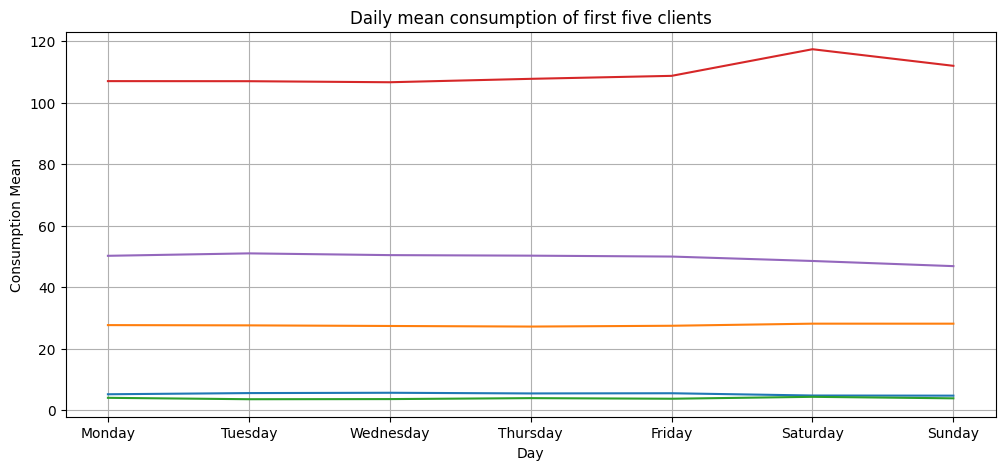

In [16]:
# Plot styling
plt.figure(figsize=(12, 5))
plt.xlabel("Day")
plt.ylabel("Consumption Mean")
plt.title("Daily mean consumption of first five clients")

# Plot data
daily_plot = daily_dt.loc[:][['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005']]

plt.plot(daily_plot)
plt.grid()
plt.show()

- Monthly grouped consumption mean of each client

In [17]:
monthly_dt = data.groupby('Month Name').mean()
monthly_dt = monthly_dt.drop(columns=['Year', 'Day', 'Month'])

# Sort by month
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_dt = monthly_dt.reindex(new_order, axis=0)
monthly_dt

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_14016\1203135433.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_dt = data.groupby('Month Name').mean()


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Month Name,,,,,,,,,,,,,,,,,,,,,
January,5.807884,27.017308,9.259811,126.257121,65.251005,231.644159,4.463951,270.107738,69.533149,67.994494,...,256.913025,34284.162186,2141.659767,2939.559405,69.459778,12.452326,495.553345,134.613356,778.061080,9109.383173
February,5.211599,26.506499,18.606370,129.279003,63.243364,228.734827,4.346507,261.634730,63.433901,61.314174,...,242.480336,31724.301471,2046.748056,2712.530637,75.147794,12.006864,557.024243,132.614202,772.826731,8880.128511
March,5.574631,25.669876,2.354097,110.688352,51.501442,192.241303,4.012946,244.943461,50.146902,54.840034,...,246.100296,33441.487455,2113.644742,3213.149642,74.063900,11.897141,559.499998,121.338731,793.709319,9820.507604
April,4.327793,24.019579,2.048541,103.046899,45.313206,172.291116,3.512264,236.977023,45.247952,53.672466,...,251.162282,37219.814815,2094.693995,3495.941183,74.158729,10.561393,568.809649,118.640829,792.416436,11577.737738
May,5.846547,27.360977,1.778588,96.736175,37.266424,163.207779,2.999817,234.778339,40.608473,50.746353,...,272.123934,48918.615591,2307.034334,4102.372006,82.356082,10.381013,585.080606,120.564591,812.404909,13112.602926
June,3.449456,29.220092,1.742044,96.851005,36.646483,162.620908,2.927541,245.373878,42.086530,42.408652,...,316.788686,60355.706019,2664.664401,4786.887100,94.931250,14.270109,595.524725,121.355036,872.287729,13803.652402
July,2.953976,33.029289,1.750465,102.265504,48.303365,170.604919,17.361174,261.517882,49.606448,54.366112,...,351.886709,77587.992832,3122.422890,5123.813742,111.987308,14.779310,634.232085,127.220509,957.429557,13623.510607
August,7.984775,31.971673,1.757277,100.829673,42.128082,161.804022,15.208408,262.430156,45.378569,45.108418,...,371.344377,82407.515681,3213.549465,4988.058508,101.815976,13.759186,627.384995,126.362785,958.883844,13695.645646
September,8.108168,28.334255,1.750591,100.603169,40.977868,169.778232,5.102080,256.562149,55.033913,50.877763,...,337.628298,70598.576389,3062.901430,4777.643624,111.882364,13.159499,602.784789,125.764971,914.793601,13166.744870


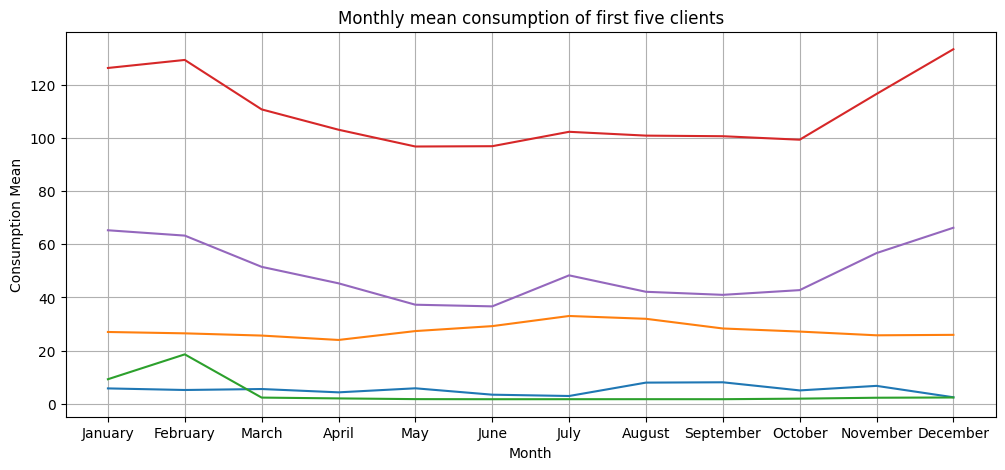

In [18]:
# Plot styling
plt.figure(figsize=(12, 5))
plt.xlabel("Month")
plt.ylabel("Consumption Mean")
plt.title("Monthly mean consumption of first five clients")

# Plot data
monthly_plot = monthly_dt.loc[:][['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005']]

plt.plot(monthly_plot)
plt.grid()
plt.show()

- Yearly grouped consumption mean of each client

In [19]:
yearly_dt = data.groupby('Year').mean()
yearly_dt = yearly_dt.drop(columns=['Day', 'Month'])
yearly_dt

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_14016\278300405.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_dt = data.groupby('Year').mean()


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Year,,,,,,,,,,,,,,,,,,,,,
2012,5.496698,26.842841,7.750324,99.668929,47.163530,185.883577,4.806117,254.049872,55.001017,53.203680,...,295.679096,53383.956626,2798.317376,4071.638516,101.108481,12.780865,582.790653,124.669636,859.719076,0.000000
2013,6.324027,29.535317,2.200142,108.006935,49.765773,192.505504,7.414558,260.241782,54.035348,60.812681,...,291.472436,48697.308790,2461.028505,4028.794365,77.287979,13.106546,543.156824,128.245897,829.852665,17199.134426
2014,4.058161,26.678553,1.709477,121.009091,52.002346,186.390129,5.863605,251.135499,50.822087,54.772119,...,285.485661,48306.669521,2287.827775,3656.566521,83.157561,11.181687,570.651878,125.817477,810.773611,17713.979390


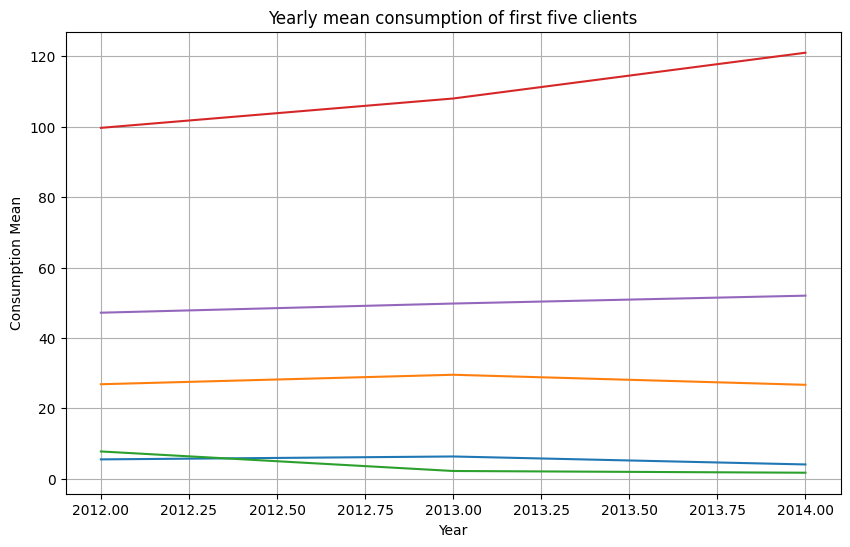

In [20]:
# Plot styling
plt.figure(figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Consumption Mean")
plt.title("Yearly mean consumption of first five clients")

# Plot data
yearly_plot = yearly_dt.loc[:][['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005']]

plt.plot(yearly_plot)
plt.grid()
plt.show()

- Hourly grouped consumption mean of each client

###### Group by time and aggregate by mean

In [21]:
hourly_dt = data.groupby("Time")
hourly_dt = hourly_dt.agg("mean")
hourly_dt = hourly_dt.drop(columns=['Year', 'Day', 'Month'])
hourly_dt

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_14016\3140190597.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_dt = hourly_dt.agg("mean")


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,4.763515,25.392998,3.829580,123.251217,59.036185,189.897788,7.095538,244.817395,52.181167,52.433090,...,114.240610,38080.839416,1457.093689,1940.817850,36.011001,17.294657,668.212448,148.853625,832.232512,11538.873545
00:15:00,4.728778,25.472168,4.228313,118.481470,56.584921,178.289016,6.822693,235.300081,50.546169,51.034063,...,110.032198,33987.773723,1100.857741,1736.168713,32.407760,16.812026,653.012311,154.201650,829.298623,11633.527323
00:30:00,4.853829,24.202843,4.325816,114.473918,54.372886,170.302724,6.623603,228.203569,49.258907,50.091241,...,103.861554,29096.350365,1056.615541,1618.011778,29.862056,16.005860,648.241190,151.432436,810.285201,11726.159006
00:45:00,4.873513,23.934831,4.374172,110.813156,52.816228,163.508538,6.482796,221.202291,47.800967,48.930618,...,90.995353,25733.120438,927.777264,1455.312707,28.959164,16.066189,641.314413,147.993005,800.456740,11715.673703
01:00:00,4.931407,23.026965,4.441552,105.507462,51.231752,155.275135,6.318779,215.048908,46.824754,48.114355,...,86.181924,21899.087591,899.735132,1419.542137,28.388165,16.437239,633.619419,144.515494,791.859762,11705.869008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,5.459400,26.245055,4.082454,151.938312,68.491855,242.513360,7.988863,286.398044,62.090054,60.769367,...,216.400433,61836.587591,2445.101481,3522.146649,110.509712,17.391824,702.316829,149.976238,852.450660,11778.319195
23:00:00,5.510347,26.178214,3.920742,145.252878,67.374711,234.415733,7.836193,278.957458,60.526836,59.434110,...,186.528653,56282.481752,2320.998491,3376.658925,104.836599,17.154780,699.465852,147.699024,856.231404,11679.029394
23:15:00,5.541610,26.051671,3.851776,138.257744,65.631120,222.529979,7.657219,270.610607,57.862986,57.076564,...,163.585578,51019.799270,2163.517509,2965.245521,83.515736,17.330961,690.365797,146.355544,855.907646,11530.144013


###### Divide each curve by its mean

In [22]:
hourly_dt_norm = hourly_dt/(hourly_dt.mean())

###### Plot first three and last three clients

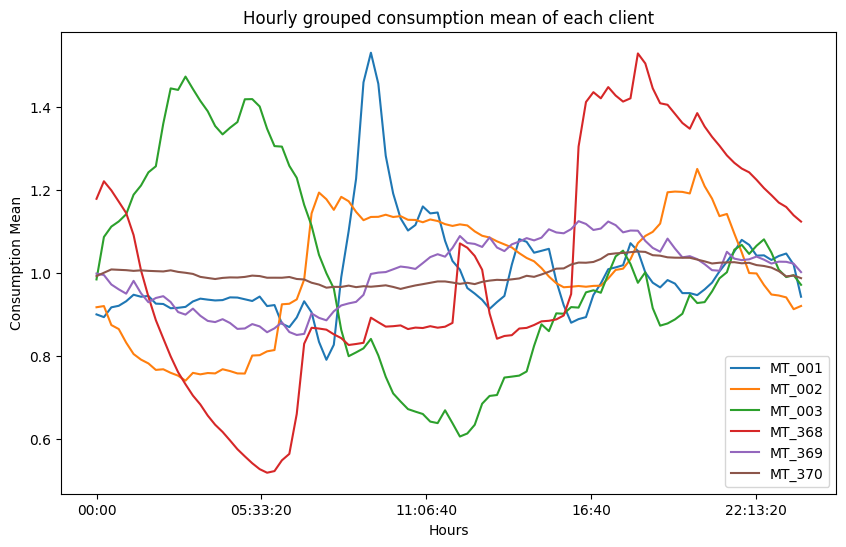

In [23]:
hourly_dt_norm[['MT_001','MT_002', 'MT_003', 'MT_368', 'MT_369','MT_370']].plot(title='Hourly grouped consumption mean of each client', ylabel="Consumption Mean", xlabel="Hours", figsize=(10, 6))
plt.show()

### Data Scaling and kwh convertion

In [24]:
# Counting the numerical colmns in the dataset and extract them into a dataframe
numeric_columns = data.iloc[:, :370]
numeric_columns.reset_index(drop=True, inplace=True)
numeric_columns.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205,0.0
2,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041,0.0
3,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,114.204140,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938,0.0
4,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387,0.0


###### Convert data to kwh

In [25]:
numeric_columns = numeric_columns/4
numeric_columns.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.951777,5.6899,19.331017,34.044715,17.682927,87.797619,2.402487,69.86532,18.793706,21.774194,...,32.119914,7125.0,432.489451,426.136364,3.911343,3.218256,126.207199,15.859766,190.432551,0.0
2,1.269036,5.6899,19.331017,34.044715,18.292683,88.541667,2.261164,69.86532,18.356643,21.236559,...,31.941470,6600.0,413.502110,414.772727,3.911343,3.364541,131.255487,15.025042,175.586510,0.0
3,0.951777,5.6899,19.331017,35.060976,17.378049,87.053571,2.119842,69.86532,18.793706,22.849462,...,28.551035,6300.0,333.333333,409.090909,3.911343,2.633119,131.694469,14.190317,174.120235,0.0
4,0.951777,5.6899,19.331017,35.060976,18.902439,84.821429,1.837196,69.86532,17.045455,22.043011,...,28.015703,5950.0,331.223629,409.090909,3.911343,3.657109,134.986831,15.859766,173.387097,0.0


In [26]:
# Store column names in an array
cols = ['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006',
       'MT_007', 'MT_008', 'MT_009', 'MT_010', 'MT_011', 'MT_012',
       'MT_013', 'MT_014', 'MT_015', 'MT_016', 'MT_017', 'MT_018',
       'MT_019', 'MT_020', 'MT_021', 'MT_022', 'MT_023', 'MT_024',
       'MT_025', 'MT_026', 'MT_027', 'MT_028', 'MT_029', 'MT_030',
       'MT_031', 'MT_032', 'MT_033', 'MT_034', 'MT_035', 'MT_036',
       'MT_037', 'MT_038', 'MT_039', 'MT_040', 'MT_041', 'MT_042',
       'MT_043', 'MT_044', 'MT_045', 'MT_046', 'MT_047', 'MT_048',
       'MT_049', 'MT_050', 'MT_051', 'MT_052', 'MT_053', 'MT_054',
       'MT_055', 'MT_056', 'MT_057', 'MT_058', 'MT_059', 'MT_060',
       'MT_061', 'MT_062', 'MT_063', 'MT_064', 'MT_065', 'MT_066',
       'MT_067', 'MT_068', 'MT_069', 'MT_070', 'MT_071', 'MT_072',
       'MT_073', 'MT_074', 'MT_075', 'MT_076', 'MT_077', 'MT_078',
       'MT_079', 'MT_080', 'MT_081', 'MT_082', 'MT_083', 'MT_084',
       'MT_085', 'MT_086', 'MT_087', 'MT_088', 'MT_089', 'MT_090',
       'MT_091', 'MT_092', 'MT_093', 'MT_094', 'MT_095', 'MT_096',
       'MT_097', 'MT_098', 'MT_099', 'MT_100', 'MT_101', 'MT_102',
       'MT_103', 'MT_104', 'MT_105', 'MT_106', 'MT_107', 'MT_108',
       'MT_109', 'MT_110', 'MT_111', 'MT_112', 'MT_113', 'MT_114',
       'MT_115', 'MT_116', 'MT_117', 'MT_118', 'MT_119', 'MT_120',
       'MT_121', 'MT_122', 'MT_123', 'MT_124', 'MT_125', 'MT_126',
       'MT_127', 'MT_128', 'MT_129', 'MT_130', 'MT_131', 'MT_132',
       'MT_133', 'MT_134', 'MT_135', 'MT_136', 'MT_137', 'MT_138',
       'MT_139', 'MT_140', 'MT_141', 'MT_142', 'MT_143', 'MT_144',
       'MT_145', 'MT_146', 'MT_147', 'MT_148', 'MT_149', 'MT_150',
       'MT_151', 'MT_152', 'MT_153', 'MT_154', 'MT_155', 'MT_156',
       'MT_157', 'MT_158', 'MT_159', 'MT_160', 'MT_161', 'MT_162',
       'MT_163', 'MT_164', 'MT_165', 'MT_166', 'MT_167', 'MT_168',
       'MT_169', 'MT_170', 'MT_171', 'MT_172', 'MT_173', 'MT_174',
       'MT_175', 'MT_176', 'MT_177', 'MT_178', 'MT_179', 'MT_180',
       'MT_181', 'MT_182', 'MT_183', 'MT_184', 'MT_185', 'MT_186',
       'MT_187', 'MT_188', 'MT_189', 'MT_190', 'MT_191', 'MT_192',
       'MT_193', 'MT_194', 'MT_195', 'MT_196', 'MT_197', 'MT_198',
       'MT_199', 'MT_200', 'MT_201', 'MT_202', 'MT_203', 'MT_204',
       'MT_205', 'MT_206', 'MT_207', 'MT_208', 'MT_209', 'MT_210',
       'MT_211', 'MT_212', 'MT_213', 'MT_214', 'MT_215', 'MT_216',
       'MT_217', 'MT_218', 'MT_219', 'MT_220', 'MT_221', 'MT_222',
       'MT_223', 'MT_224', 'MT_225', 'MT_226', 'MT_227', 'MT_228',
       'MT_229', 'MT_230', 'MT_231', 'MT_232', 'MT_233', 'MT_234',
       'MT_235', 'MT_236', 'MT_237', 'MT_238', 'MT_239', 'MT_240',
       'MT_241', 'MT_242', 'MT_243', 'MT_244', 'MT_245', 'MT_246',
       'MT_247', 'MT_248', 'MT_249', 'MT_250', 'MT_251', 'MT_252',
       'MT_253', 'MT_254', 'MT_255', 'MT_256', 'MT_257', 'MT_258',
       'MT_259', 'MT_260', 'MT_261', 'MT_262', 'MT_263', 'MT_264',
       'MT_265', 'MT_266', 'MT_267', 'MT_268', 'MT_269', 'MT_270',
       'MT_271', 'MT_272', 'MT_273', 'MT_274', 'MT_275', 'MT_276',
       'MT_277', 'MT_278', 'MT_279', 'MT_280', 'MT_281', 'MT_282',
       'MT_283', 'MT_284', 'MT_285', 'MT_286', 'MT_287', 'MT_288',
       'MT_289', 'MT_290', 'MT_291', 'MT_292', 'MT_293', 'MT_294',
       'MT_295', 'MT_296', 'MT_297', 'MT_298', 'MT_299', 'MT_300',
       'MT_301', 'MT_302', 'MT_303', 'MT_304', 'MT_305', 'MT_306',
       'MT_307', 'MT_308', 'MT_309', 'MT_310', 'MT_311', 'MT_312',
       'MT_313', 'MT_314', 'MT_315', 'MT_316', 'MT_317', 'MT_318',
       'MT_319', 'MT_320', 'MT_321', 'MT_322', 'MT_323', 'MT_324',
       'MT_325', 'MT_326', 'MT_327', 'MT_328', 'MT_329', 'MT_330',
       'MT_331', 'MT_332', 'MT_333', 'MT_334', 'MT_335', 'MT_336',
       'MT_337', 'MT_338', 'MT_339', 'MT_340', 'MT_341', 'MT_342',
       'MT_343', 'MT_344', 'MT_345', 'MT_346', 'MT_347', 'MT_348',
       'MT_349', 'MT_350', 'MT_351', 'MT_352', 'MT_353', 'MT_354',
       'MT_355', 'MT_356', 'MT_357', 'MT_358', 'MT_359', 'MT_360',
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366',
       'MT_367', 'MT_368', 'MT_369', 'MT_370']

In [27]:
# Initialize a minmax scaler 
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))

# Scale the dataframe
df_scaled = scaler.fit_transform(numeric_columns.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.078947,0.197531,0.511494,0.424051,0.471545,0.655556,0.215190,0.506098,0.477778,0.437838,...,0.150628,0.147822,0.223190,0.137615,0.046693,0.213592,0.443331,0.175115,0.491718,0.0
2,0.105263,0.197531,0.511494,0.424051,0.487805,0.661111,0.202532,0.506098,0.466667,0.427027,...,0.149791,0.136929,0.213391,0.133945,0.046693,0.223301,0.461064,0.165899,0.453384,0.0
3,0.078947,0.197531,0.511494,0.436709,0.463415,0.650000,0.189873,0.506098,0.477778,0.459459,...,0.133891,0.130705,0.172020,0.132110,0.046693,0.174757,0.462606,0.156682,0.449598,0.0
4,0.078947,0.197531,0.511494,0.436709,0.504065,0.633333,0.164557,0.506098,0.433333,0.443243,...,0.131381,0.123444,0.170931,0.132110,0.046693,0.242718,0.474171,0.175115,0.447705,0.0


###### Distribution of values in dataset

Text(13.319444444444452, 0.5, 'Frequency')

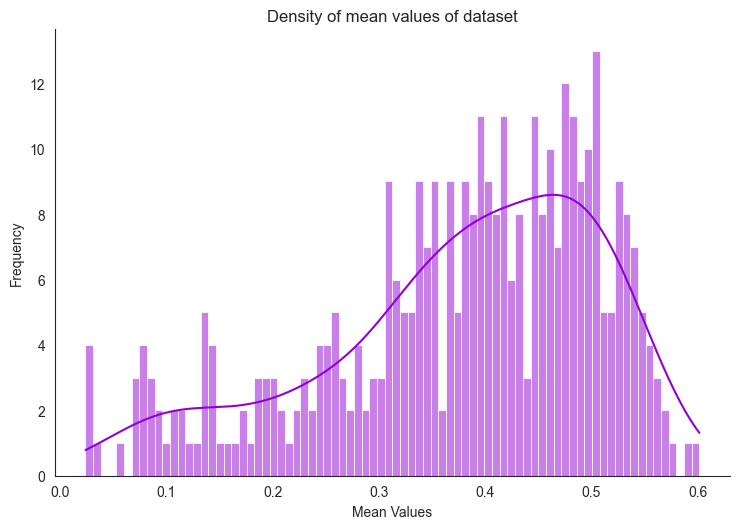

In [28]:
# Plotting mean scaled values in distribution graph so we predict that our dataset's distribution would be the normal one
mean_values = df_scaled.mean(axis=0)
sns.set_style('white')
sns.displot(data=df_scaled, x=mean_values, kind="hist", bins = 80, aspect = 1.50, color="darkviolet", kde=True)
plt.title('Density of mean values of dataset', fontsize=12)
plt.xlabel('Mean Values', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

In [29]:
# Checking which distribution corresponts to our data
f = Fitter(df_scaled, distributions=get_common_distributions())
f.fit()

Fitting 10 distributions:  30%|███       | 3/10 [00:21<00:37,  5.34s/it]SKIPPED cauchy distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
Fitting 10 distributions:  40%|████      | 4/10 [00:30<00:40,  6.80s/it]SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
Fitting 10 distributions: 100%|██████████| 10/10 [00:40<00:00,  4.10s/it]


cauchy was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,63.012297,99.786809,-5.190893e+08,0.091326,0.042353,0.0
rayleigh,68.570538,67.321985,-5.157985e+08,0.153605,0.066482,0.0
uniform,90.678018,4.000000,-5.049194e+08,0.731198,0.256318,0.0
expon,95.275666,74.245991,-5.029940e+08,0.437662,0.213850,0.0
cauchy,inf,inf,inf,inf,NaN,NaN


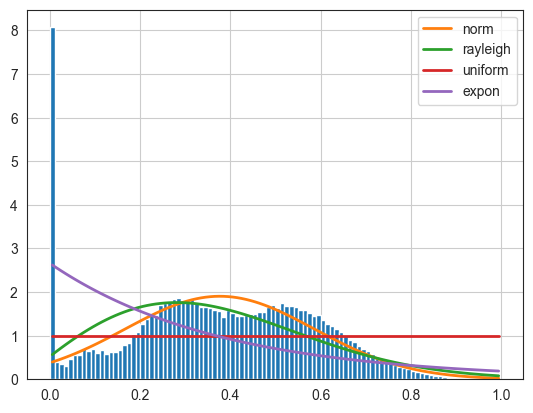

In [30]:
# Plot best distributions of data
f.summary()

In [31]:
# Get the best distribution
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.37644729108471653, 'scale': 0.2095199118665052}}

###### Trend and seasonality

Text(0.5, 1.0, 'MT_010')

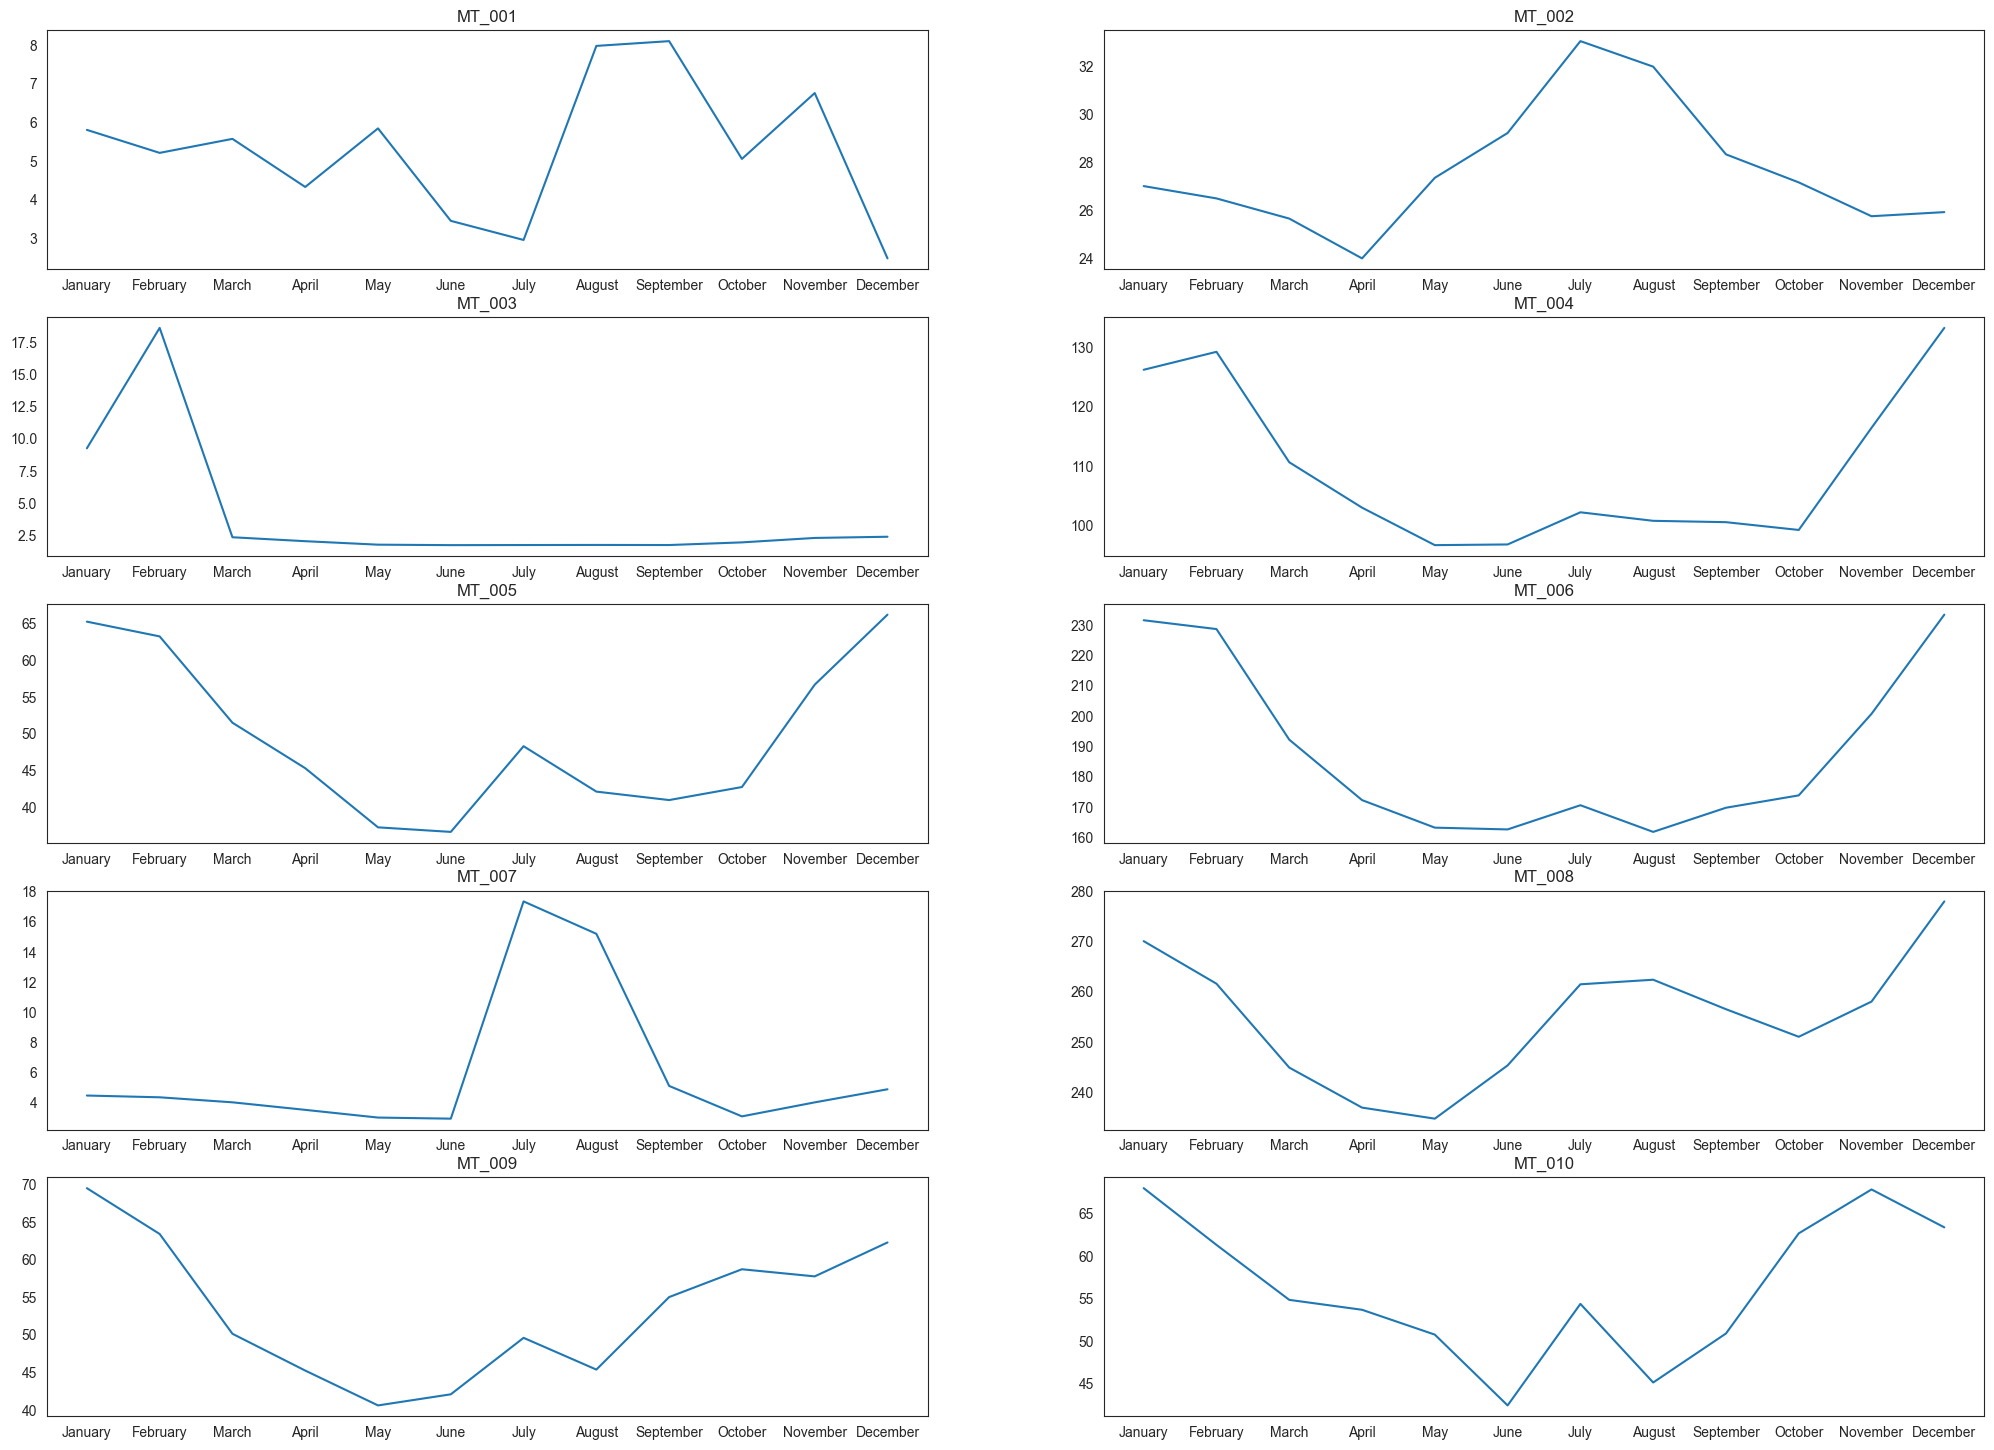

In [32]:
# Subploting first 10 clients in order to observe trend or seasonality (we observe trend)
figure, axis = plt.subplots(5, 2, figsize=(25, 18))

axis[0, 0].plot(monthly_dt['MT_001'])
axis[0, 0].set_title("MT_001")  

axis[0, 1].plot(monthly_dt['MT_002'])
axis[0, 1].set_title("MT_002")

axis[1, 0].plot(monthly_dt['MT_003'])
axis[1, 0].set_title("MT_003")
  
axis[1, 1].plot(monthly_dt['MT_004'])
axis[1, 1].set_title("MT_004")

axis[2, 0].plot(monthly_dt['MT_005'])
axis[2, 0].set_title("MT_005")
  
axis[2, 1].plot(monthly_dt['MT_006'])
axis[2, 1].set_title("MT_006")
  
axis[3, 0].plot(monthly_dt['MT_007'])
axis[3, 0].set_title("MT_007")
  
axis[3, 1].plot(monthly_dt['MT_008'])
axis[3, 1].set_title("MT_008")

axis[4, 0].plot(monthly_dt['MT_009'])
axis[4, 0].set_title("MT_009")
  
axis[4, 1].plot(monthly_dt['MT_010'])
axis[4, 1].set_title("MT_010")

## Question 2

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics

### PCA

In [34]:
pca = PCA()
pca.fit(df_scaled.T)

PCA()

In [35]:
pca.explained_variance_ratio_

array([5.62581875e-01, 8.32563417e-02, 7.91453457e-02, 3.78098777e-02,
       2.98035258e-02, 2.51256588e-02, 1.93672433e-02, 9.71948697e-03,
       8.92926452e-03, 6.85020557e-03, 6.27127802e-03, 4.71037361e-03,
       4.47060193e-03, 4.00043344e-03, 3.52631228e-03, 3.27490136e-03,
       2.76900648e-03, 2.50926234e-03, 2.41069426e-03, 2.37853325e-03,
       2.19591760e-03, 2.11097753e-03, 1.99981696e-03, 1.98525982e-03,
       1.80402076e-03, 1.76657999e-03, 1.64557427e-03, 1.56551634e-03,
       1.51512806e-03, 1.43614949e-03, 1.35234624e-03, 1.30178556e-03,
       1.22603141e-03, 1.21601830e-03, 1.16613090e-03, 1.09010452e-03,
       1.06788040e-03, 1.02595181e-03, 1.01542017e-03, 1.00598926e-03,
       9.28114949e-04, 9.14093162e-04, 8.87180809e-04, 8.71290328e-04,
       8.24407695e-04, 8.16549278e-04, 7.76895803e-04, 7.61579478e-04,
       7.52210530e-04, 7.19890018e-04, 7.07145242e-04, 6.89727313e-04,
       6.75177815e-04, 6.42869539e-04, 6.34444160e-04, 6.31141401e-04,
      

In [36]:
pca.explained_variance_ratio_.size

370

Percentage Variation

Determining the principal components that make up 80% of the variation

Text(0, 0.5, 'Percentage of explained variance')

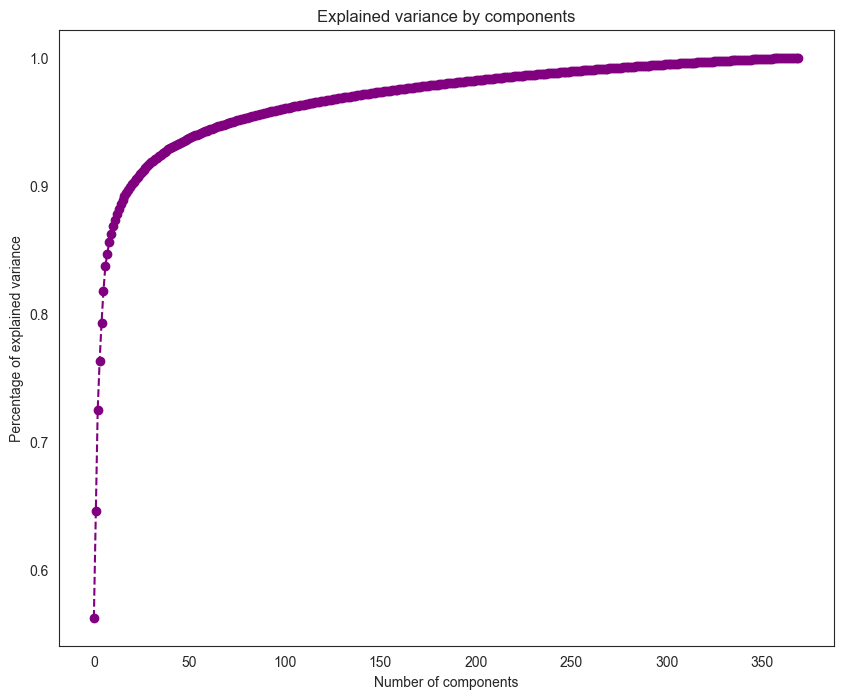

In [37]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--', color='purple')
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

In [38]:
percentage_variation = np.round(pca.explained_variance_ratio_* 100,decimals=1)
x = 0
for i in range(0, len(percentage_variation)):
    if(x > 80):
        print(i)
        break
    x += percentage_variation[i]
print(x)


6
81.8


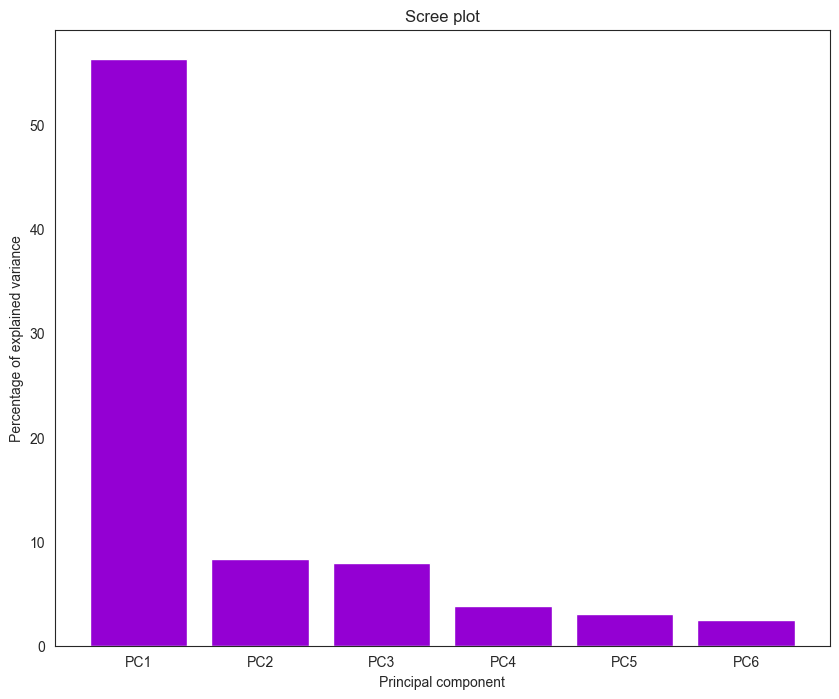

In [39]:
labels = ['PC' + str(x) for x in range(1, len(percentage_variation)+1)]

plt.figure(figsize=(10,8))
plt.bar(x= range(1, len(percentage_variation[0:6]) + 1), height= percentage_variation[0:6], tick_label= labels[0:6], color='darkviolet')
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

We can see that the most importants components are the first 2, we will use this later.

In [40]:
pca = PCA(n_components = 6)
pca.fit(df_scaled.T)

PCA(n_components=6)

In [41]:
pca.transform(df_scaled.T)

array([[ 86.61911079, -20.74994671, -10.57429319,  10.81382701,
         -7.51034102, -12.27713928],
       [ 44.97641841, -11.20434202,  -1.63451891,   4.10797037,
         -7.61598086, -14.28015411],
       [113.11855499, -27.92970167, -14.73269581,   9.76882547,
         -6.50374668, -11.26616933],
       ...,
       [ 12.13702889, -12.71186442,  17.89119286,  21.38591538,
         19.80779916,  11.04325901],
       [-46.88466085,  -2.55606605,  18.92264395,   7.59543653,
        -10.34790959,  -4.87986568],
       [ 19.11714652,  57.53857374,  42.24738521,  -6.75649353,
         11.35122906, -33.18235628]])

In [42]:
scores_pca = pca.transform(df_scaled.T)

#### K-means clustering for 8 clusters

In [43]:
kmeans_pca = KMeans(n_clusters = 8, init = 'k-means++')

In [44]:
kmeans_pca.fit(scores_pca)

c:\Users\Anastasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

Results

In [45]:
df_scores_pca = pd.DataFrame(scores_pca)
df_scores_pca.columns = ['Component 0', 'Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']


In [46]:

df_segm_pca_kmeans = pd.concat([df_scaled.T.reset_index(drop = True), df_scores_pca], axis = 1)
df_segm_pca_kmeans.head()

,0,1,2,3,4,5,6,7,8,9,...,105212,105213,105214,105215,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5
0,0.0,0.078947,0.105263,0.078947,0.078947,0.105263,0.078947,0.078947,0.131579,0.078947,...,0.052632,0.052632,0.052632,0.026316,86.619111,-20.749947,-10.574293,10.813827,-7.510341,-12.277139
1,0.0,0.197531,0.197531,0.197531,0.197531,0.191358,0.197531,0.197531,0.216049,0.203704,...,0.191358,0.185185,0.179012,0.185185,44.976418,-11.204342,-1.634519,4.107970,-7.615981,-14.280154
2,0.0,0.511494,0.511494,0.511494,0.511494,0.511494,0.511494,0.511494,0.511494,0.511494,...,0.011494,0.011494,0.011494,0.011494,113.118555,-27.929702,-14.732696,9.768825,-6.503747,-11.266169
3,0.0,0.424051,0.424051,0.436709,0.436709,0.455696,0.417722,0.411392,0.424051,0.417722,...,0.468354,0.518987,0.506329,0.518987,17.600291,-13.419135,22.559565,-17.976715,2.557194,4.860085
4,0.0,0.471545,0.487805,0.463415,0.504065,0.487805,0.487805,0.447154,0.447154,0.455285,...,0.569106,0.544715,0.552846,0.569106,22.308462,-19.297394,27.275858,-8.077855,4.443689,2.703872


In [47]:
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth', 6:'seventh', 7:'eighth'})

In [48]:
df_segm_pca_kmeans['Segment']

0        third
1       second
2        third
3       second
4       second
        ...   
365      third
366      first
367    seventh
368      fifth
369     eighth
Name: Segment, Length: 370, dtype: object

In [49]:
colors = {'first':'g', 'second':'r', 'third':'c', 'fourth':'m', 'fifth':'y', 'sixth':'#80B3FF', 'seventh':'#7E2F8E', 'eighth':'#D95319'}

<AxesSubplot: xlabel='Component 1', ylabel='Component 0'>

<Figure size 1000x800 with 0 Axes>

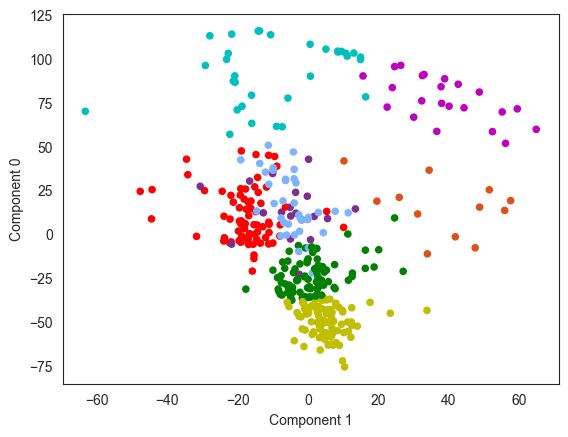

In [50]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 0']
plt.figure(figsize = (10,8))
df_segm_pca_kmeans.plot.scatter(x = 'Component 1', y = 'Component 0', c = df_segm_pca_kmeans['Segment'].map(colors))

#### DBSCAN clustering


In [51]:
dbscan = DBSCAN(eps=16.5, min_samples=7).fit(scores_pca)

In [52]:
db_labels = dbscan.labels_

In [53]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in labels else 0)
n_noise_ = list(db_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 123


In [54]:
unique_labels = set(db_labels)
unique_labels


{-1, 0, 1, 2, 3}

In [55]:
df_segm_pca_kmeans['Segment DBSCAN PCA'] = dbscan.labels_
df_segm_pca_kmeans['DBSCAN Segment'] = df_segm_pca_kmeans['Segment DBSCAN PCA'].map({-1:'noise',0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth', 6:'seventh', 7:'eighth',8:'ninth',9:'tenth',10:'eleventh',11:'twelveth',12:'thirteenth'})

In [56]:
colors = {'noise':'#000000','first':'g', 'second':'r', 'third':'c', 'fourth':'b', 'fifth':'y', 'sixth':'#80B3FF', 'seventh':'#7E2F8E', 'eighth':'#D95319','ninth':'#382A53','tenth':'b','eleventh':'#984521','twelveth':'#333333','thirteenth':'#777777'}

<AxesSubplot: xlabel='Component 1', ylabel='Component 0'>

<Figure size 1500x1500 with 0 Axes>

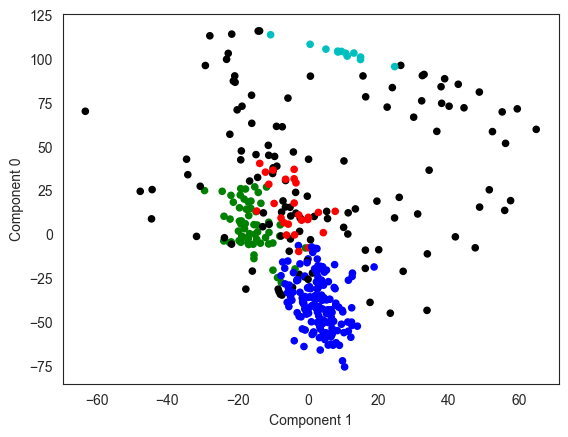

In [57]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 0']
plt.figure(figsize = (15,15))
#sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c', 'm', 'y', '#80B3FF', '#7E2F8E', '#D95319'])
df_segm_pca_kmeans.plot.scatter(x = 'Component 1', y = 'Component 0', c = df_segm_pca_kmeans['DBSCAN Segment'].map(colors))

One of the clusters

In [58]:
target_cluster = df_segm_pca_kmeans.loc[df_segm_pca_kmeans['DBSCAN Segment'] == 'fourth']
target_cluster.head(15)

,0,1,2,3,4,5,6,7,8,9,...,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Segment K-means PCA,Segment,Segment DBSCAN PCA,DBSCAN Segment
90,0.000000,0.354348,0.306522,0.500000,0.510870,0.493478,0.495652,0.500000,0.510870,0.482609,...,-21.970497,-4.177274,3.510759,12.208674,-14.861286,-14.925488,0,first,3,fourth
125,0.000000,0.176136,0.153409,0.153409,0.164773,0.170455,0.164773,0.159091,0.176136,0.170455,...,-14.136746,-0.001929,-4.113086,-8.085402,3.539473,3.479443,0,first,3,fourth
134,0.000000,0.298611,0.298611,0.215278,0.243056,0.298611,0.229167,0.194444,0.194444,0.173611,...,-26.291631,11.440051,-16.630269,16.282918,7.685293,9.839731,0,first,3,fourth
136,0.000000,0.208955,0.208955,0.273632,0.213930,0.208955,0.208955,0.208955,0.213930,0.283582,...,-17.390708,7.519793,-14.445352,11.100261,-0.454473,2.345588,0,first,3,fourth
138,0.000000,0.577869,0.577869,0.616803,0.615779,0.604508,0.605533,0.598361,0.594262,0.579918,...,-37.669628,-4.613690,-4.133999,12.970673,-6.783231,-1.942244,0,first,3,fourth
165,0.355646,0.302551,0.260118,0.244152,0.228240,0.329072,0.286639,0.254761,0.249456,0.329072,...,-75.720041,10.366576,1.872650,-3.439388,2.098758,6.839829,4,fifth,3,fourth
167,0.240324,0.211794,0.232184,0.224004,0.219934,0.252533,0.199585,0.219934,0.268813,0.195515,...,-37.521400,5.233025,-0.623388,8.931042,-8.875155,0.749301,4,fifth,3,fourth
168,0.309800,0.286806,0.272113,0.264766,0.302454,0.264766,0.257420,0.250000,0.257420,0.309800,...,-41.998002,12.382578,1.082628,8.203000,-7.954308,0.313189,4,fifth,3,fourth
170,0.417311,0.410019,0.417311,0.410019,0.424603,0.424603,0.417311,0.402654,0.410019,0.395362,...,-66.093246,3.443814,4.820072,9.992136,-13.338050,0.743492,4,fifth,3,fourth
171,0.333077,0.308976,0.304118,0.318597,0.318597,0.313787,0.293727,0.323456,0.269627,0.318597,...,-31.111962,7.660759,-2.875356,8.801229,-3.308408,-2.360555,0,first,3,fourth


In [57]:
target_cluster.shape

(151, 105226)

# Question 3

## Long-Term prediction

In [59]:
# Keeping only the data
lt_data = target_cluster.iloc[:,:-10]
# transpose
lt_data = lt_data.T
names = lt_data.columns
lt_data.head()



,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.355646,0.240324,0.309800,0.417311,0.333077,...,0.238182,0.320538,0.240963,0.280899,0.343174,0.175739,0.351351,0.000000,0.000000,0.000000
1,0.354348,0.176136,0.298611,0.208955,0.577869,0.302551,0.211794,0.286806,0.410019,0.308976,...,0.230909,0.333148,0.243973,0.269663,0.327369,0.159249,0.373464,0.156660,0.196114,0.491718
2,0.306522,0.153409,0.298611,0.208955,0.577869,0.260118,0.232184,0.272113,0.417311,0.304118,...,0.223636,0.290247,0.249992,0.258427,0.327369,0.167481,0.351351,0.154784,0.271403,0.453384
3,0.500000,0.153409,0.215278,0.273632,0.616803,0.244152,0.224004,0.264766,0.410019,0.318597,...,0.225455,0.330626,0.243973,0.247191,0.351056,0.181227,0.353808,0.156660,0.307225,0.449598
4,0.510870,0.164773,0.243056,0.213930,0.615779,0.228240,0.219934,0.302454,0.424603,0.318597,...,0.229091,0.330626,0.256012,0.255618,0.347115,0.153762,0.351351,0.151032,0.305404,0.447705


### Seeing the data

(array([[1.6000e+01, 2.4500e+02, 1.1466e+04, ..., 3.4060e+03, 5.2900e+02,
         1.4200e+02],
        [8.6000e+01, 8.1210e+03, 1.9175e+04, ..., 8.0300e+02, 4.8000e+01,
         2.2000e+01],
        [3.7000e+01, 2.4256e+04, 1.7181e+04, ..., 7.5150e+03, 1.2230e+03,
         1.9500e+02],
        ...,
        [1.0600e+02, 1.7771e+04, 1.9226e+04, ..., 1.4130e+03, 2.5200e+02,
         6.7000e+01],
        [8.1000e+01, 7.2310e+03, 1.4214e+04, ..., 1.2800e+04, 5.6900e+02,
         5.0000e+01],
        [3.2000e+01, 8.0000e+00, 4.0000e+01, ..., 5.3780e+03, 1.0170e+03,
         2.0000e+01]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 151 BarContainer objects>)

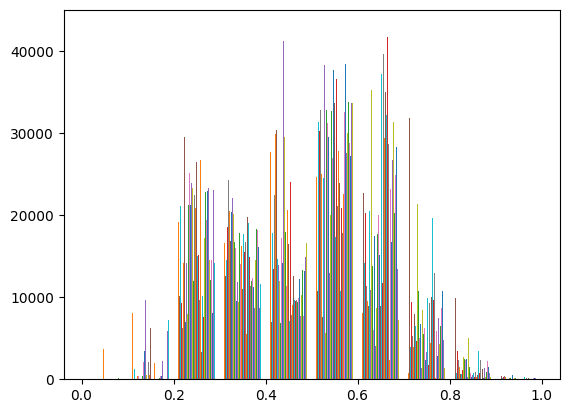

In [ ]:
plt.hist(lt_data)

In [60]:
lt_data.describe()

,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
count,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,...,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000
mean,0.450782,0.416856,0.434123,0.412891,0.479220,0.601471,0.482281,0.503433,0.575218,0.464101,...,0.506067,0.482046,0.502653,0.455743,0.546581,0.414549,0.444273,0.405356,0.493685,0.538030
std,0.125066,0.141954,0.213096,0.176229,0.162813,0.183578,0.155667,0.142341,0.144582,0.151389,...,0.160018,0.163468,0.164780,0.166763,0.146382,0.161008,0.156777,0.168547,0.180317,0.090390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.358696,0.289773,0.201389,0.218905,0.314549,0.445871,0.346221,0.361446,0.431967,0.318597,...,0.410909,0.315493,0.346396,0.280899,0.402333,0.241645,0.314496,0.222326,0.326047,0.469948
50%,0.443478,0.437500,0.506944,0.442786,0.517418,0.663502,0.530748,0.538422,0.610617,0.492399,...,0.494545,0.521022,0.537336,0.502809,0.596918,0.451325,0.459459,0.452158,0.525197,0.527212
75%,0.526087,0.528409,0.618056,0.552239,0.608607,0.743118,0.600138,0.622612,0.691556,0.574466,...,0.609091,0.601957,0.624891,0.575843,0.660177,0.520139,0.550369,0.546904,0.647845,0.587317
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
lt_data.max().max()

1.0000000000000002

In [62]:
lt_data.min().min()

0.0

Replacing everything above 1 with 1

In [63]:
lt_data = np.clip(lt_data, a_min = 0, a_max = 1)

In [64]:
lt_data.max().max()

1.0

(array([[1.6000e+01, 2.4500e+02, 1.1466e+04, ..., 3.4060e+03, 5.2900e+02,
         1.4200e+02],
        [8.6000e+01, 8.1210e+03, 1.9175e+04, ..., 8.0300e+02, 4.8000e+01,
         2.2000e+01],
        [3.7000e+01, 2.4256e+04, 1.7181e+04, ..., 7.5150e+03, 1.2230e+03,
         1.9500e+02],
        ...,
        [1.0600e+02, 1.7771e+04, 1.9226e+04, ..., 1.4130e+03, 2.5200e+02,
         6.7000e+01],
        [8.1000e+01, 7.2310e+03, 1.4214e+04, ..., 1.2800e+04, 5.6900e+02,
         5.0000e+01],
        [3.2000e+01, 8.0000e+00, 4.0000e+01, ..., 5.3780e+03, 1.0170e+03,
         2.0000e+01]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 151 BarContainer objects>)

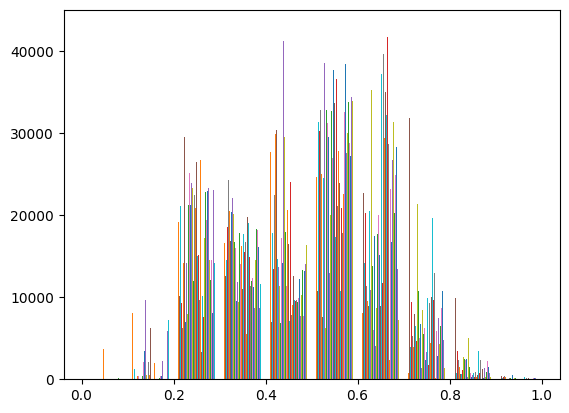

In [ ]:
plt.hist(lt_data)

In [66]:
lt_data.shape

(105216, 151)

In [67]:
lt_data.head()

,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.355646,0.240324,0.309800,0.417311,0.333077,...,0.238182,0.320538,0.240963,0.280899,0.343174,0.175739,0.351351,0.000000,0.000000,0.000000
1,0.354348,0.176136,0.298611,0.208955,0.577869,0.302551,0.211794,0.286806,0.410019,0.308976,...,0.230909,0.333148,0.243973,0.269663,0.327369,0.159249,0.373464,0.156660,0.196114,0.491718
2,0.306522,0.153409,0.298611,0.208955,0.577869,0.260118,0.232184,0.272113,0.417311,0.304118,...,0.223636,0.290247,0.249992,0.258427,0.327369,0.167481,0.351351,0.154784,0.271403,0.453384
3,0.500000,0.153409,0.215278,0.273632,0.616803,0.244152,0.224004,0.264766,0.410019,0.318597,...,0.225455,0.330626,0.243973,0.247191,0.351056,0.181227,0.353808,0.156660,0.307225,0.449598
4,0.510870,0.164773,0.243056,0.213930,0.615779,0.228240,0.219934,0.302454,0.424603,0.318597,...,0.229091,0.330626,0.256012,0.255618,0.347115,0.153762,0.351351,0.151032,0.305404,0.447705


Daily consumption

In [68]:
new_df = pd.concat([lt_data.reset_index(drop = True), data.iloc[:,-7:].reset_index(drop = True)], axis = 1)
new_daily = new_df.groupby('Day Name').mean()
new_daily = new_daily.drop(columns=['Year', 'Day', 'Month'])

# Sort by day
new_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
new_daily = new_daily.reindex(new_order, axis=0)
new_daily

,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
Day Name,,,,,,,,,,,,,,,,,,,,,
Monday,0.406091,0.409573,0.458097,0.433093,0.486004,0.596601,0.478621,0.501256,0.573332,0.467063,...,0.502731,0.477332,0.498234,0.450992,0.540646,0.412639,0.437147,0.401540,0.492591,0.537699
Tuesday,0.440069,0.412011,0.456711,0.430617,0.494737,0.604242,0.482127,0.504163,0.578019,0.466600,...,0.505159,0.482044,0.500393,0.456868,0.542767,0.412991,0.444580,0.398842,0.490467,0.561630
Wednesday,0.451042,0.408781,0.458092,0.433734,0.495560,0.597744,0.479515,0.505367,0.573695,0.464760,...,0.506798,0.479478,0.496756,0.450745,0.542685,0.413697,0.441961,0.402558,0.490128,0.555723
Thursday,0.463322,0.414795,0.457978,0.430791,0.500331,0.601093,0.480120,0.504137,0.575210,0.466105,...,0.510384,0.481748,0.499888,0.454897,0.546461,0.415698,0.444373,0.400859,0.493482,0.563433
Friday,0.466526,0.430285,0.458507,0.429288,0.501761,0.605780,0.485010,0.506083,0.578753,0.467870,...,0.513668,0.486090,0.509212,0.458267,0.552480,0.417945,0.447183,0.406658,0.498810,0.567756
Saturday,0.467411,0.427522,0.393040,0.381778,0.463511,0.608050,0.489978,0.507960,0.577010,0.473261,...,0.509533,0.485613,0.510292,0.462118,0.556245,0.416433,0.452536,0.416453,0.500249,0.515482
Sunday,0.461299,0.415165,0.356479,0.350960,0.412814,0.596852,0.480652,0.495112,0.570544,0.443145,...,0.494296,0.482064,0.503869,0.456364,0.544884,0.412480,0.442204,0.410631,0.490139,0.464690


In [69]:
new_daily.sum(axis="columns")

Day Name
Monday       72.794613
Tuesday      73.189144
Wednesday    72.935378
Thursday     73.255146
Friday       74.241470
Saturday     74.760704
Sunday       73.061335
dtype: float64

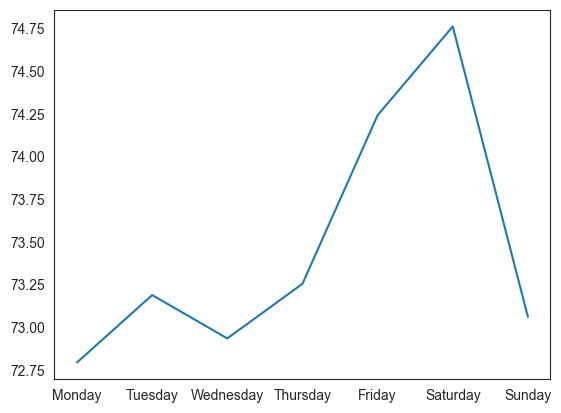

In [70]:
plt.plot(new_daily.sum(axis="columns"))

In [71]:
new_daily.T.describe()

Day Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.482084,0.484696,0.483016,0.485133,0.491665,0.495104,0.483850
std,0.046541,0.047391,0.046625,0.046818,0.047270,0.049091,0.049417
min,0.378701,0.379466,0.379773,0.380283,0.385286,0.381778,0.350960
25%,0.450573,0.452369,0.450608,0.453168,0.458651,0.464843,0.455806
50%,0.481813,0.484463,0.484161,0.485030,0.491143,0.494925,0.486436
75%,0.517723,0.521270,0.520191,0.521498,0.528611,0.534348,0.517460
max,0.596601,0.604242,0.597744,0.601093,0.605780,0.608050,0.596852


Monthly consumption

In [72]:
new_monthly = new_df.groupby('Month Name').mean()
new_monthly = new_monthly.drop(columns=['Year', 'Day', 'Month'])

# Sort by month
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
new_monthly = new_monthly.reindex(new_order, axis=0)
new_monthly

,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
Month Name,,,,,,,,,,,,,,,,,,,,,
January,0.442665,0.367627,0.433890,0.370910,0.433543,0.551813,0.485462,0.486515,0.589903,0.453235,...,0.396316,0.452009,0.481241,0.415053,0.530138,0.377721,0.450035,0.386889,0.455543,0.502260
February,0.468591,0.366160,0.427391,0.366995,0.428868,0.553323,0.491723,0.489269,0.557723,0.469228,...,0.400777,0.442760,0.482368,0.413540,0.515428,0.378576,0.456745,0.377541,0.446313,0.498881
March,0.461795,0.383101,0.410407,0.377297,0.418222,0.572377,0.478345,0.487385,0.569729,0.444544,...,0.410917,0.450613,0.477556,0.429252,0.519868,0.380158,0.412315,0.384154,0.448493,0.512361
April,0.464081,0.393657,0.406188,0.386974,0.437819,0.576532,0.472160,0.485921,0.564021,0.445101,...,0.434574,0.449590,0.472658,0.434330,0.528990,0.385635,0.404561,0.395615,0.474190,0.511527
May,0.454416,0.423750,0.437012,0.418930,0.495188,0.592577,0.469860,0.489025,0.572612,0.452949,...,0.498796,0.495415,0.494293,0.456241,0.539841,0.405496,0.434357,0.402837,0.503564,0.524430
June,0.500837,0.456014,0.460110,0.450690,0.514368,0.630253,0.476162,0.517057,0.577019,0.485486,...,0.577535,0.513322,0.530432,0.471908,0.554139,0.442472,0.497929,0.426045,0.519358,0.563086
July,0.469470,0.470144,0.475813,0.486552,0.541672,0.659158,0.494658,0.535535,0.604838,0.493960,...,0.661156,0.541209,0.559125,0.515372,0.577227,0.484270,0.507977,0.455006,0.539614,0.618047
August,0.450529,0.462574,0.449102,0.448197,0.529822,0.655327,0.501999,0.542460,0.602806,0.480843,...,0.697174,0.555370,0.569143,0.524457,0.591839,0.493801,0.498241,0.428205,0.540012,0.618986
September,0.463244,0.465366,0.459062,0.465240,0.588328,0.660260,0.516149,0.533966,0.595781,0.474284,...,0.618607,0.529344,0.544802,0.499012,0.583454,0.455997,0.473118,0.416358,0.531778,0.590525


In [73]:
new_monthly.sum(axis="columns")

Month Name
January      69.834597
February     70.132825
March        68.976412
April        68.927080
May          71.815696
June         76.645596
July         81.397091
August       82.358398
September    79.863048
October      74.199468
November     68.721957
December     68.381716
dtype: float64

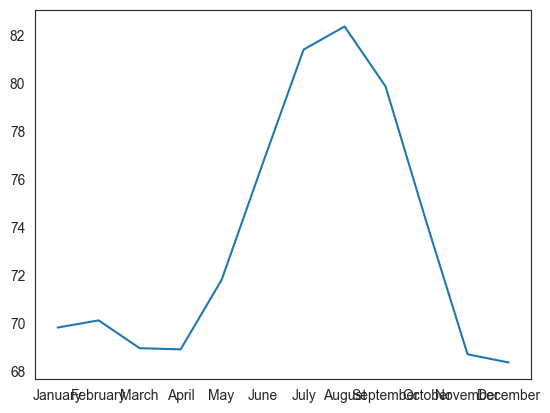

In [74]:
plt.plot(new_monthly.sum(axis="columns"))

In [75]:
new_monthly.T.describe()

Month Name,January,February,March,April,May,June,July,August,September,October,November,December
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.462481,0.464456,0.456797,0.456471,0.475601,0.507587,0.539054,0.545420,0.528894,0.491387,0.455112,0.452859
std,0.049832,0.050400,0.050584,0.049114,0.049622,0.050640,0.049870,0.054278,0.055963,0.055229,0.049385,0.046774
min,0.344682,0.333341,0.321437,0.322282,0.346311,0.363724,0.408862,0.416202,0.374433,0.363873,0.347468,0.351194
25%,0.427858,0.427873,0.424566,0.422970,0.441093,0.472131,0.502840,0.509125,0.489193,0.451889,0.422149,0.412663
50%,0.468044,0.469768,0.456328,0.458954,0.474710,0.505698,0.535535,0.543578,0.528953,0.493408,0.453137,0.459692
75%,0.501057,0.504126,0.494061,0.491032,0.512016,0.547925,0.575293,0.586112,0.571130,0.528219,0.494980,0.485117
max,0.589903,0.561811,0.572377,0.576532,0.592577,0.630253,0.661156,0.697174,0.660260,0.633199,0.580639,0.560514


Yearly consumption

In [76]:
new_yearly = new_df.groupby('Year').mean()
new_yearly = new_yearly.drop(columns=['Day', 'Month'])
new_yearly



,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
Year,,,,,,,,,,,,,,,,,,,,,
2012,0.471117,0.410318,0.435438,0.419563,0.529223,0.607196,0.490423,0.491059,0.612374,0.457648,...,0.518041,0.516954,0.540198,0.473887,0.554907,0.417080,0.494362,0.423786,0.514148,0.554972
2013,0.465527,0.412659,0.426121,0.401928,0.472146,0.600104,0.478480,0.499345,0.562166,0.467322,...,0.491860,0.476931,0.500278,0.446180,0.567897,0.425334,0.433458,0.414448,0.494487,0.535693
2014,0.415647,0.427609,0.440805,0.417164,0.436154,0.597096,0.477919,0.519928,0.551013,0.467351,...,0.508268,0.452157,0.467380,0.447111,0.516917,0.401225,0.404863,0.377782,0.472363,0.523377


In [77]:
new_yearly.sum(axis="columns")

Year
2012    75.889737
2013    73.105163
2014    71.380952
dtype: float64

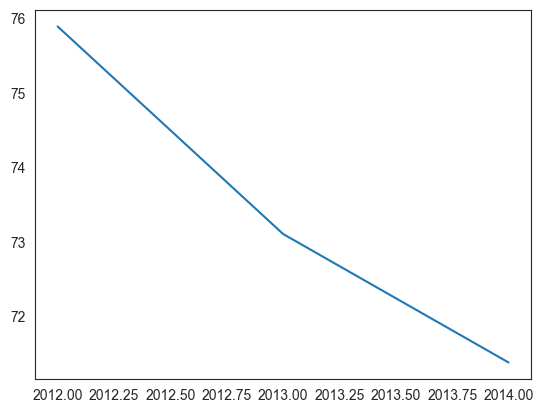

In [78]:
plt.plot(new_yearly.sum(axis="columns"))

In [79]:
new_yearly.T.describe()

Year,2012,2013,2014
count,151.000000,151.000000,151.000000
mean,0.502581,0.484140,0.472722
std,0.050191,0.048653,0.048806
min,0.363058,0.373119,0.375028
25%,0.471487,0.452515,0.439834
50%,0.508510,0.487542,0.471113
75%,0.538260,0.521970,0.514448
max,0.612374,0.600104,0.600510


### Data Augmnentation

In [281]:
step = 1536 # segment size, 16 days

# divide time series using rolling windows
def divide_chunks(ts, w):
    chunks = []
    
    # looping till length ts minus the step,  with step w/2
    for i in range(0, len(ts) , int(w/2)):
        chunks.append(ts[i:i + w])
    
    return chunks

In [81]:
lt_data_augmented = pd.DataFrame()
label_size = 288 # label size, 3 days


def get_labels(ts_chunks, column_name):
    chunk_labels = []
    temp_names = []
    # calculate label for each chunk 
    for i in range(0, len(ts_chunks)-1):
        temp_names.append(column_name+'_segment_'+str(i))
        chunk_labels.append(np.sum(ts_chunks[i+1][768:1056]))

    temp_names.append(column_name+'_segment_'+str(i+1))
    chunk_labels.append(0) # last value is set to 0 cause it doesn't exist
    temp_df = pd.DataFrame(ts_chunks, temp_names).T
    temp_labels_df = pd.DataFrame(chunk_labels, temp_names).T
    temp_df = pd.concat([temp_labels_df.reset_index(drop = True), temp_df.reset_index(drop = True)], axis = 0)

    return temp_df

for i in range(0,lt_data.shape[1]):
    temp = divide_chunks(lt_data.iloc[:,i].values, int(step))
    
    temp_df = get_labels(temp, str(lt_data.columns[i]))
    lt_data_augmented = pd.concat([lt_data_augmented.reset_index(drop = True), temp_df.reset_index(drop = True)], axis = 1)

In [82]:
lt_data_augmented.tail()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134,368_segment_135,368_segment_136
1532,0.354348,0.369565,0.430435,0.436957,0.432609,0.402174,0.304348,0.308696,0.354348,0.308696,...,0.525319,0.451491,0.476574,0.461903,0.447705,0.419309,0.464742,0.467582,0.421202,NaN
1533,0.356522,0.391304,0.386957,0.389130,0.404348,0.406522,0.250000,0.339130,0.384783,0.319565,...,0.519167,0.456223,0.463322,0.465689,0.443445,0.424988,0.470421,0.460956,0.420256,NaN
1534,0.380435,0.406522,0.419565,0.395652,0.419565,0.334783,0.323913,0.308696,0.336957,0.369565,...,0.552769,0.464269,0.482726,0.477047,0.454330,0.430194,0.467582,0.483673,0.432087,NaN
1535,0.391304,0.356522,0.408696,0.408696,0.382609,0.410870,0.265217,0.336957,0.393478,0.352174,...,0.536678,0.458116,0.478467,0.467108,0.455750,0.430194,0.472788,0.467108,0.432560,NaN
1536,0.384783,0.391304,0.393478,0.426087,0.423913,0.395652,0.269565,0.315217,0.384783,0.308696,...,0.496451,0.451018,0.478467,0.452911,0.443445,0.421202,0.458116,0.451018,0.417416,NaN


In [83]:
# we notice that the last column contain NaN values so we drop them
lt_data_augmented.drop((list(lt_data_augmented.filter(regex='segment_136'))), axis=1, inplace = True)

lt_data_augmented.tail()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_126,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134,368_segment_135
1532,0.354348,0.369565,0.430435,0.436957,0.432609,0.402174,0.304348,0.308696,0.354348,0.308696,...,0.557501,0.525319,0.451491,0.476574,0.461903,0.447705,0.419309,0.464742,0.467582,0.421202
1533,0.356522,0.391304,0.386957,0.389130,0.404348,0.406522,0.250000,0.339130,0.384783,0.319565,...,0.537151,0.519167,0.456223,0.463322,0.465689,0.443445,0.424988,0.470421,0.460956,0.420256
1534,0.380435,0.406522,0.419565,0.395652,0.419565,0.334783,0.323913,0.308696,0.336957,0.369565,...,0.540937,0.552769,0.464269,0.482726,0.477047,0.454330,0.430194,0.467582,0.483673,0.432087
1535,0.391304,0.356522,0.408696,0.408696,0.382609,0.410870,0.265217,0.336957,0.393478,0.352174,...,0.547563,0.536678,0.458116,0.478467,0.467108,0.455750,0.430194,0.472788,0.467108,0.432560
1536,0.384783,0.391304,0.393478,0.426087,0.423913,0.395652,0.269565,0.315217,0.384783,0.308696,...,0.526266,0.496451,0.451018,0.478467,0.452911,0.443445,0.421202,0.458116,0.451018,0.417416


In [84]:
lt_data_augmented.head()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_126,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134,368_segment_135
0,146.697826,150.808696,163.108696,158.654348,150.256522,144.913043,114.580435,138.530435,153.830435,138.817391,...,171.803597,159.601988,142.718410,133.576905,139.269285,137.883578,143.055372,148.420256,141.697586,0.000000
1,0.000000,0.336957,0.345652,0.378261,0.395652,0.410870,0.404348,0.415217,0.313043,0.332609,...,0.537624,0.434927,0.531472,0.496451,0.447231,0.478467,0.459063,0.442972,0.417889,0.461429
2,0.354348,0.334783,0.384783,0.376087,0.410870,0.356522,0.417391,0.402174,0.252174,0.326087,...,0.531472,0.409371,0.518221,0.485092,0.446285,0.471368,0.468055,0.457170,0.434453,0.460009
3,0.306522,0.369565,0.352174,0.354348,0.382609,0.434783,0.393478,0.347826,0.273913,0.306522,...,0.508282,0.395173,0.492191,0.495031,0.432087,0.470421,0.471841,0.451018,0.432560,0.454330
4,0.500000,0.543478,0.528261,0.550000,0.573913,0.610870,0.582609,0.493478,0.432609,0.528261,...,0.503549,0.393753,0.488405,0.496451,0.429721,0.461429,0.458590,0.440133,0.411737,0.440606


In [85]:
# we notice that the last column contain label is 0, this is what we want to predict
# we seperate it from the rest of the dataset
X = lt_data_augmented.loc[:, list(lt_data_augmented.filter(regex='segment_135'))] # keeping segment 135 which is the most recent consumption 
X

,90_segment_135,125_segment_135,134_segment_135,136_segment_135,138_segment_135,165_segment_135,167_segment_135,168_segment_135,170_segment_135,171_segment_135,...,324_segment_135,325_segment_135,326_segment_135,327_segment_135,328_segment_135,329_segment_135,330_segment_135,344_segment_135,352_segment_135,368_segment_135
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.258696,0.420455,0.131944,0.278607,0.300205,0.456479,0.329942,0.390905,0.307496,0.221474,...,0.343636,0.376075,0.328307,0.258427,0.295838,0.203205,0.171990,0.307692,0.388585,0.461429
2,0.260870,0.352273,0.131944,0.228856,0.267418,0.498966,0.354361,0.368792,0.344101,0.211853,...,0.332727,0.365961,0.340376,0.264045,0.291897,0.214180,0.189189,0.292683,0.386157,0.460009
3,0.258696,0.318182,0.131944,0.223881,0.262295,0.419350,0.362501,0.376212,0.351393,0.255195,...,0.321818,0.363439,0.289150,0.250000,0.295838,0.194946,0.174447,0.261726,0.460838,0.454330
4,0.397826,0.318182,0.138889,0.228856,0.254098,0.398080,0.342151,0.309800,0.322153,0.264816,...,0.320000,0.365961,0.328307,0.219101,0.283974,0.192202,0.184275,0.214822,0.451730,0.440606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,0.315217,0.142045,0.173611,0.378109,0.372951,0.265422,0.301412,0.346679,0.292839,0.269627,...,0.221818,0.199400,0.183717,0.193820,0.394451,0.161993,0.159705,0.206379,0.160291,0.421202
1533,0.330435,0.153409,0.138889,0.278607,0.360656,0.244152,0.264743,0.272113,0.329444,0.240764,...,0.214545,0.227143,0.195786,0.207865,0.287916,0.159249,0.167076,0.190432,0.161506,0.420256
1534,0.328261,0.130682,0.131944,0.223881,0.363730,0.302551,0.276993,0.295034,0.322153,0.235905,...,0.212727,0.164065,0.156629,0.196629,0.240580,0.172996,0.164619,0.193246,0.160899,0.432087
1535,0.334783,0.125000,0.138889,0.218905,0.368852,0.265422,0.256603,0.295034,0.300204,0.235905,...,0.203636,0.171631,0.189767,0.185393,0.236639,0.151018,0.157248,0.188555,0.162720,0.432560


In [86]:
lt_data_augmented.drop((list(lt_data_augmented.filter(regex='segment_135'))), axis=1, inplace = True)
lt_data_augmented.head()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_125,368_segment_126,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134
0,146.697826,150.808696,163.108696,158.654348,150.256522,144.913043,114.580435,138.530435,153.830435,138.817391,...,152.080454,171.803597,159.601988,142.718410,133.576905,139.269285,137.883578,143.055372,148.420256,141.697586
1,0.000000,0.336957,0.345652,0.378261,0.395652,0.410870,0.404348,0.415217,0.313043,0.332609,...,0.540937,0.537624,0.434927,0.531472,0.496451,0.447231,0.478467,0.459063,0.442972,0.417889
2,0.354348,0.334783,0.384783,0.376087,0.410870,0.356522,0.417391,0.402174,0.252174,0.326087,...,0.523900,0.531472,0.409371,0.518221,0.485092,0.446285,0.471368,0.468055,0.457170,0.434453
3,0.306522,0.369565,0.352174,0.354348,0.382609,0.434783,0.393478,0.347826,0.273913,0.306522,...,0.507336,0.508282,0.395173,0.492191,0.495031,0.432087,0.470421,0.471841,0.451018,0.432560
4,0.500000,0.543478,0.528261,0.550000,0.573913,0.610870,0.582609,0.493478,0.432609,0.528261,...,0.500710,0.503549,0.393753,0.488405,0.496451,0.429721,0.461429,0.458590,0.440133,0.411737


### Split the data

In [87]:
# Splitting into train validation and test sets
test_size = math.floor(lt_data_augmented.shape[1] * 0.2)
lt_train = lt_data_augmented[lt_data_augmented.columns[:(-test_size)]]
lt_test = lt_data_augmented[lt_data_augmented.columns[-test_size:]]



In [88]:
lt_train.head()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,300_segment_98,300_segment_99,300_segment_100,300_segment_101,300_segment_102,300_segment_103,300_segment_104,300_segment_105,300_segment_106,300_segment_107
0,146.697826,150.808696,163.108696,158.654348,150.256522,144.913043,114.580435,138.530435,153.830435,138.817391,...,123.048360,120.608485,120.707537,130.740060,134.988523,122.085456,125.275505,123.729128,134.534385,127.238470
1,0.000000,0.336957,0.345652,0.378261,0.395652,0.410870,0.404348,0.415217,0.313043,0.332609,...,0.236381,0.224268,0.257578,0.242437,0.209097,0.224268,0.293947,0.278806,0.254550,0.266693
2,0.354348,0.334783,0.384783,0.376087,0.410870,0.356522,0.417391,0.402174,0.252174,0.326087,...,0.260606,0.242437,0.248493,0.236381,0.242437,0.251522,0.300033,0.290918,0.278806,0.275777
3,0.306522,0.369565,0.352174,0.354348,0.382609,0.434783,0.393478,0.347826,0.273913,0.306522,...,0.230324,0.221209,0.233353,0.254550,0.227296,0.227296,0.287890,0.263665,0.257578,0.254550
4,0.500000,0.543478,0.528261,0.550000,0.573913,0.610870,0.582609,0.493478,0.432609,0.528261,...,0.227296,0.236381,0.248493,0.239409,0.245465,0.257578,0.284862,0.269721,0.254550,0.257578


In [89]:
lt_test.head()

,300_segment_108,300_segment_109,300_segment_110,300_segment_111,300_segment_112,300_segment_113,300_segment_114,300_segment_115,300_segment_116,300_segment_117,...,368_segment_125,368_segment_126,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134
0,134.135724,135.154347,154.328589,138.927293,137.302759,146.568119,143.507283,157.603670,154.196378,149.049511,...,152.080454,171.803597,159.601988,142.718410,133.576905,139.269285,137.883578,143.055372,148.420256,141.697586
1,0.266693,0.233353,0.287890,0.296975,0.394846,0.309118,0.278806,0.275777,0.357599,0.342458,...,0.540937,0.537624,0.434927,0.531472,0.496451,0.447231,0.478467,0.459063,0.442972,0.417889
2,0.263665,0.254550,0.330315,0.263665,0.394846,0.284862,0.269721,0.275777,0.269721,0.330315,...,0.523900,0.531472,0.409371,0.518221,0.485092,0.446285,0.471368,0.468055,0.457170,0.434453
3,0.269721,0.254550,0.293947,0.278806,0.360627,0.312146,0.296975,0.278806,0.275777,0.333343,...,0.507336,0.508282,0.395173,0.492191,0.495031,0.432087,0.470421,0.471841,0.451018,0.432560
4,0.260606,0.239409,0.300033,0.236381,0.342458,0.272749,0.284862,0.278806,0.278806,0.336372,...,0.500710,0.503549,0.393753,0.488405,0.496451,0.429721,0.461429,0.458590,0.440133,0.411737


### Creating X and y sets

In [90]:
# y set is the label (first row) and the rest is the x set
y_train = pd.DataFrame(lt_train.iloc[0])
X_train = pd.DataFrame(lt_train.iloc[1:]).T

In [91]:
y_train.head()

,0
90_segment_0,146.697826
90_segment_1,150.808696
90_segment_2,163.108696
90_segment_3,158.654348
90_segment_4,150.256522


In [92]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536
90_segment_0,0.000000,0.354348,0.306522,0.500000,0.510870,0.493478,0.495652,0.500000,0.510870,0.482609,...,0.378261,0.386957,0.354348,0.332609,0.397826,0.354348,0.356522,0.380435,0.391304,0.384783
90_segment_1,0.336957,0.334783,0.369565,0.543478,0.547826,0.526087,0.547826,0.541304,0.554348,0.528261,...,0.310870,0.308696,0.343478,0.360870,0.404348,0.369565,0.391304,0.406522,0.356522,0.391304
90_segment_2,0.345652,0.384783,0.352174,0.528261,0.530435,0.517391,0.534783,0.536957,0.552174,0.532609,...,0.332609,0.354348,0.343478,0.369565,0.443478,0.430435,0.386957,0.419565,0.408696,0.393478
90_segment_3,0.378261,0.376087,0.354348,0.550000,0.571739,0.582609,0.545652,0.576087,0.582609,0.558696,...,0.352174,0.356522,0.367391,0.397826,0.380435,0.436957,0.389130,0.395652,0.408696,0.426087
90_segment_4,0.395652,0.410870,0.382609,0.573913,0.580435,0.591304,0.630435,0.604348,0.621739,0.586957,...,0.345652,0.326087,0.313043,0.354348,0.452174,0.432609,0.404348,0.419565,0.382609,0.423913


In [93]:
#x and y sets for validation and test sets as well
y_test = pd.DataFrame(lt_test.iloc[0])
X_test = pd.DataFrame(lt_test.iloc[1:]).T

### Training and comparing the algorithms

In [94]:
models = []
models.append(('LR', LinearRegression(), {'positive': [True,False]}))
models.append(('NN', MLPRegressor(early_stopping=True), {"learning_rate_init": [0.1,0.01]}))  #neural network
models.append(('KNN', KNeighborsRegressor(), {'n_neighbors':[10, 15, 20, 25]})) 
models.append(('RF', RandomForestRegressor(n_estimators=10), {'max_depth':[5, 10]})) # Ensemble method - collection of many decision trees

In [95]:
r2_scores_test = []
rmse_scores_test = []
model_gscvs = []
names = []
for name, model, parameters in models:
    # gridsearch cross validation for each of the models to find the best parameters 
    model_gscv = GridSearchCV(model, parameters, n_jobs=-1) 
    model_gscv.fit(X_train, y_train)
    model_gscvs.append(model_gscv)
    # predictions using the best estimator we got from gscv
    y_test_pred = model_gscv.best_estimator_.predict(X_test)
    # calculating r2 score
    r2_scores_test.append(r2_score(y_test, y_test_pred))
    # calculating rmse
    rmse_scores_test.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
    names.append(name)
    print(r2_scores_test[-1])

0.9116893910450358


c:\Users\Evi Palioura\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9183009045079331
0.8852340116642916


c:\Users\Evi Palioura\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8672006730576207


The scores

In [96]:
print(r2_scores_test)
print(rmse_scores_test)

[0.9116893910450358, 0.9183009045079331, 0.8852340116642916, 0.8672006730576207]
[6.081899139148515, 5.849805117382349, 6.933290135971684, 7.45814308100268]


Plotting the scores so we can understand better

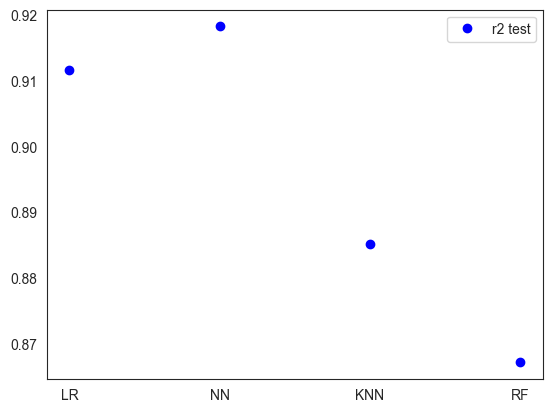

In [97]:
plt.plot(names, r2_scores_test, 'bo', label='r2 test')
plt.legend()

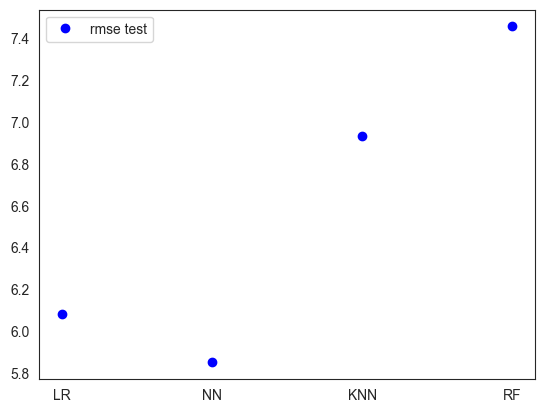

In [98]:
plt.plot(names, rmse_scores_test, 'bo', label='rmse test')
plt.legend()

based on the above we choose the Neural Network (MLPRegressor)

### Predicting the total consumption for the next 3 days

In [99]:
best_name, best_model, best_params = models[1]
X = X.iloc[1:]
X

,90_segment_135,125_segment_135,134_segment_135,136_segment_135,138_segment_135,165_segment_135,167_segment_135,168_segment_135,170_segment_135,171_segment_135,...,324_segment_135,325_segment_135,326_segment_135,327_segment_135,328_segment_135,329_segment_135,330_segment_135,344_segment_135,352_segment_135,368_segment_135
1,0.258696,0.420455,0.131944,0.278607,0.300205,0.456479,0.329942,0.390905,0.307496,0.221474,...,0.343636,0.376075,0.328307,0.258427,0.295838,0.203205,0.171990,0.307692,0.388585,0.461429
2,0.260870,0.352273,0.131944,0.228856,0.267418,0.498966,0.354361,0.368792,0.344101,0.211853,...,0.332727,0.365961,0.340376,0.264045,0.291897,0.214180,0.189189,0.292683,0.386157,0.460009
3,0.258696,0.318182,0.131944,0.223881,0.262295,0.419350,0.362501,0.376212,0.351393,0.255195,...,0.321818,0.363439,0.289150,0.250000,0.295838,0.194946,0.174447,0.261726,0.460838,0.454330
4,0.397826,0.318182,0.138889,0.228856,0.254098,0.398080,0.342151,0.309800,0.322153,0.264816,...,0.320000,0.365961,0.328307,0.219101,0.283974,0.192202,0.184275,0.214822,0.451730,0.440606
5,0.445652,0.301136,0.131944,0.223881,0.231557,0.382167,0.386960,0.279459,0.314788,0.284058,...,0.347273,0.373528,0.316268,0.227528,0.287916,0.192202,0.181818,0.207317,0.451123,0.458590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,0.315217,0.142045,0.173611,0.378109,0.372951,0.265422,0.301412,0.346679,0.292839,0.269627,...,0.221818,0.199400,0.183717,0.193820,0.394451,0.161993,0.159705,0.206379,0.160291,0.421202
1533,0.330435,0.153409,0.138889,0.278607,0.360656,0.244152,0.264743,0.272113,0.329444,0.240764,...,0.214545,0.227143,0.195786,0.207865,0.287916,0.159249,0.167076,0.190432,0.161506,0.420256
1534,0.328261,0.130682,0.131944,0.223881,0.363730,0.302551,0.276993,0.295034,0.322153,0.235905,...,0.212727,0.164065,0.156629,0.196629,0.240580,0.172996,0.164619,0.193246,0.160899,0.432087
1535,0.334783,0.125000,0.138889,0.218905,0.368852,0.265422,0.256603,0.295034,0.300204,0.235905,...,0.203636,0.171631,0.189767,0.185393,0.236639,0.151018,0.157248,0.188555,0.162720,0.432560


Training the model

In [100]:
y_train_new = pd.DataFrame(lt_data_augmented.iloc[0])
X_train_new = pd.DataFrame(lt_data_augmented.iloc[1:]).T

In [101]:
# gridsearch cross validation for each of the models to find the best parameters 
best_model_gscv = GridSearchCV(best_model, best_params, n_jobs=-1) 
best_model_gscv.fit(X_train_new, y_train_new)
# predictions using the best estimator we got from gscv
predictions = best_model_gscv.best_estimator_.predict(X.T)

c:\Users\Evi Palioura\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The predicted consumption for each client of the cluster

In [102]:
predictions = pd.DataFrame(predictions.T)
predictions.head()

,0
0,109.980639
1,105.428701
2,106.493524
3,103.204943
4,100.212466


Total predicted consumption

In [103]:
sum = predictions.sum(axis=1)
print(sum)

0      109.980639
1      105.428701
2      106.493524
3      103.204943
4      100.212466
          ...    
146    104.299963
147    101.344854
148     92.431069
149    110.378246
150    137.061199
Length: 151, dtype: float64


Average consumption per client per 15 minutes

In [104]:
sum/(151*288)

0      0.002529
1      0.002424
2      0.002449
3      0.002373
4      0.002304
         ...   
146    0.002398
147    0.002330
148    0.002125
149    0.002538
150    0.003152
Length: 151, dtype: float64

## The same thing for many labels

### Data augmentation

In [282]:
lt_data_augmented_2 = pd.DataFrame()
label_size = 288 # label size, 3 days


def get_labels_2(ts_chunks, column_name):
    chunk_labels = []
    temp_names = []
    # calculate label for each chunk 
    for i in range(0, len(ts_chunks)-1):
        temp_names.append(column_name+'_segment_'+str(i))
        chunk_labels.append(ts_chunks[i+1][768:1056])

    temp_names.append(column_name+'_segment_'+str(i+1))
    chunk_labels.append([0] * label_size) # last value is set to NaN cause it doesn't exist
    temp_df = pd.DataFrame(ts_chunks, temp_names).T
    temp_labels_df = pd.DataFrame(chunk_labels, temp_names).T
    temp_df = pd.concat([temp_labels_df.reset_index(drop = True), temp_df.reset_index(drop = True)], axis = 0)

    return temp_df

for i in range(0,lt_data.shape[1]):
    temp = divide_chunks(lt_data.iloc[:,i].values, int(step))
    
    temp_df = get_labels_2(temp, str(lt_data.columns[i]))
    lt_data_augmented_2 = pd.concat([lt_data_augmented_2.reset_index(drop = True), temp_df.reset_index(drop = True)], axis = 1)

In [283]:
lt_data_augmented_2.tail()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134,368_segment_135,368_segment_136
1819,0.354348,0.369565,0.430435,0.436957,0.432609,0.402174,0.304348,0.308696,0.354348,0.308696,...,0.525319,0.451491,0.476574,0.461903,0.447705,0.419309,0.464742,0.467582,0.421202,NaN
1820,0.356522,0.391304,0.386957,0.389130,0.404348,0.406522,0.250000,0.339130,0.384783,0.319565,...,0.519167,0.456223,0.463322,0.465689,0.443445,0.424988,0.470421,0.460956,0.420256,NaN
1821,0.380435,0.406522,0.419565,0.395652,0.419565,0.334783,0.323913,0.308696,0.336957,0.369565,...,0.552769,0.464269,0.482726,0.477047,0.454330,0.430194,0.467582,0.483673,0.432087,NaN
1822,0.391304,0.356522,0.408696,0.408696,0.382609,0.410870,0.265217,0.336957,0.393478,0.352174,...,0.536678,0.458116,0.478467,0.467108,0.455750,0.430194,0.472788,0.467108,0.432560,NaN
1823,0.384783,0.391304,0.393478,0.426087,0.423913,0.395652,0.269565,0.315217,0.384783,0.308696,...,0.496451,0.451018,0.478467,0.452911,0.443445,0.421202,0.458116,0.451018,0.417416,NaN


In [284]:
# we notice that the last column contain NaN values so we drop them
lt_data_augmented_2.drop((list(lt_data_augmented_2.filter(regex='segment_136'))), axis=1, inplace = True)

lt_data_augmented_2.tail()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_126,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134,368_segment_135
1819,0.354348,0.369565,0.430435,0.436957,0.432609,0.402174,0.304348,0.308696,0.354348,0.308696,...,0.557501,0.525319,0.451491,0.476574,0.461903,0.447705,0.419309,0.464742,0.467582,0.421202
1820,0.356522,0.391304,0.386957,0.389130,0.404348,0.406522,0.250000,0.339130,0.384783,0.319565,...,0.537151,0.519167,0.456223,0.463322,0.465689,0.443445,0.424988,0.470421,0.460956,0.420256
1821,0.380435,0.406522,0.419565,0.395652,0.419565,0.334783,0.323913,0.308696,0.336957,0.369565,...,0.540937,0.552769,0.464269,0.482726,0.477047,0.454330,0.430194,0.467582,0.483673,0.432087
1822,0.391304,0.356522,0.408696,0.408696,0.382609,0.410870,0.265217,0.336957,0.393478,0.352174,...,0.547563,0.536678,0.458116,0.478467,0.467108,0.455750,0.430194,0.472788,0.467108,0.432560
1823,0.384783,0.391304,0.393478,0.426087,0.423913,0.395652,0.269565,0.315217,0.384783,0.308696,...,0.526266,0.496451,0.451018,0.478467,0.452911,0.443445,0.421202,0.458116,0.451018,0.417416


In [285]:
lt_data_augmented_2.head(289)

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_126,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134,368_segment_135
0,0.345652,0.378261,0.395652,0.410870,0.404348,0.415217,0.313043,0.332609,0.382609,0.354348,...,0.531472,0.496451,0.447231,0.478467,0.459063,0.442972,0.417889,0.461429,0.460956,NaN
1,0.384783,0.376087,0.410870,0.356522,0.417391,0.402174,0.252174,0.326087,0.332609,0.350000,...,0.518221,0.485092,0.446285,0.471368,0.468055,0.457170,0.434453,0.460009,0.468055,NaN
2,0.352174,0.354348,0.382609,0.434783,0.393478,0.347826,0.273913,0.306522,0.365217,0.306522,...,0.492191,0.495031,0.432087,0.470421,0.471841,0.451018,0.432560,0.454330,0.472788,NaN
3,0.528261,0.550000,0.573913,0.610870,0.582609,0.493478,0.432609,0.528261,0.556522,0.350000,...,0.488405,0.496451,0.429721,0.461429,0.458590,0.440133,0.411737,0.440606,0.459536,NaN
4,0.530435,0.571739,0.580435,0.606522,0.552174,0.504348,0.443478,0.519565,0.560870,0.336957,...,0.487459,0.485566,0.426881,0.459536,0.465689,0.437293,0.416469,0.458590,0.466162,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.393478,0.467391,0.428261,0.443478,0.397826,0.367391,0.293478,0.345652,0.578261,0.302174,...,0.539044,0.489825,0.434927,0.402745,0.463322,0.463796,0.459063,0.460956,0.492664,NaN
285,0.356522,0.413043,0.419565,0.426087,0.421739,0.376087,0.247826,0.354348,0.576087,0.341304,...,0.554662,0.515381,0.473734,0.420729,0.481306,0.462376,0.474207,0.467582,0.483199,NaN
286,0.413043,0.500000,0.439130,0.413043,0.402174,0.376087,0.300000,0.308696,0.545652,0.306522,...,0.575958,0.506862,0.455277,0.418363,0.473734,0.475154,0.469001,0.451964,0.479886,NaN
287,0.400000,0.491304,0.452174,0.430435,0.441304,0.365217,0.258696,0.321739,0.541304,0.350000,...,0.546143,0.490298,0.439186,0.406531,0.453857,0.459063,0.451964,0.459536,0.466635,NaN


In [286]:
# we notice that the last column contain label is NaN, this is what we want to predict
# we seperate it from the rest of the dataset
X = lt_data_augmented_2.loc[:, list(lt_data_augmented_2.filter(regex='segment_135'))] # keeping segment 135 which is the most recent consumption 
X

,90_segment_135,125_segment_135,134_segment_135,136_segment_135,138_segment_135,165_segment_135,167_segment_135,168_segment_135,170_segment_135,171_segment_135,...,324_segment_135,325_segment_135,326_segment_135,327_segment_135,328_segment_135,329_segment_135,330_segment_135,344_segment_135,352_segment_135,368_segment_135
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.315217,0.142045,0.173611,0.378109,0.372951,0.265422,0.301412,0.346679,0.292839,0.269627,...,0.221818,0.199400,0.183717,0.193820,0.394451,0.161993,0.159705,0.206379,0.160291,0.421202
1820,0.330435,0.153409,0.138889,0.278607,0.360656,0.244152,0.264743,0.272113,0.329444,0.240764,...,0.214545,0.227143,0.195786,0.207865,0.287916,0.159249,0.167076,0.190432,0.161506,0.420256
1821,0.328261,0.130682,0.131944,0.223881,0.363730,0.302551,0.276993,0.295034,0.322153,0.235905,...,0.212727,0.164065,0.156629,0.196629,0.240580,0.172996,0.164619,0.193246,0.160899,0.432087
1822,0.334783,0.125000,0.138889,0.218905,0.368852,0.265422,0.256603,0.295034,0.300204,0.235905,...,0.203636,0.171631,0.189767,0.185393,0.236639,0.151018,0.157248,0.188555,0.162720,0.432560


In [287]:
lt_data_augmented_2.drop((list(lt_data_augmented_2.filter(regex='segment_135'))), axis=1, inplace = True)
lt_data_augmented_2.head()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_125,368_segment_126,368_segment_127,368_segment_128,368_segment_129,368_segment_130,368_segment_131,368_segment_132,368_segment_133,368_segment_134
0,0.345652,0.378261,0.395652,0.410870,0.404348,0.415217,0.313043,0.332609,0.382609,0.354348,...,0.434927,0.531472,0.496451,0.447231,0.478467,0.459063,0.442972,0.417889,0.461429,0.460956
1,0.384783,0.376087,0.410870,0.356522,0.417391,0.402174,0.252174,0.326087,0.332609,0.350000,...,0.409371,0.518221,0.485092,0.446285,0.471368,0.468055,0.457170,0.434453,0.460009,0.468055
2,0.352174,0.354348,0.382609,0.434783,0.393478,0.347826,0.273913,0.306522,0.365217,0.306522,...,0.395173,0.492191,0.495031,0.432087,0.470421,0.471841,0.451018,0.432560,0.454330,0.472788
3,0.528261,0.550000,0.573913,0.610870,0.582609,0.493478,0.432609,0.528261,0.556522,0.350000,...,0.393753,0.488405,0.496451,0.429721,0.461429,0.458590,0.440133,0.411737,0.440606,0.459536
4,0.530435,0.571739,0.580435,0.606522,0.552174,0.504348,0.443478,0.519565,0.560870,0.336957,...,0.411737,0.487459,0.485566,0.426881,0.459536,0.465689,0.437293,0.416469,0.458590,0.466162


### Split the data

In [288]:
# Splitting into train validation and test sets
test_size = math.floor(lt_data_augmented_2.shape[1] * 0.2)
lt_train_multi_output = lt_data_augmented_2[lt_data_augmented_2.columns[:(-test_size)]]
lt_test_multi_output = lt_data_augmented_2[lt_data_augmented_2.columns[-test_size:]]

### Creating X - y sets

In [289]:
# y set is the label (first 288) and the rest is the x set
y_train_multi_output = pd.DataFrame(lt_train_multi_output.iloc[:label_size]).T
X_train_multi_output = pd.DataFrame(lt_train_multi_output.iloc[label_size:]).T
#x and y sets for validation and test sets as well
y_test_multi_output = pd.DataFrame(lt_test_multi_output.iloc[:label_size]).T
X_test_multi_output = pd.DataFrame(lt_test_multi_output.iloc[label_size:]).T

Random sampling to make grid search cv faster

In [290]:
lt_train_sample_mo = lt_train_multi_output.sample(frac=0.3)
y_train_sample_mo = pd.DataFrame(lt_train_sample_mo.iloc[:label_size]).T
X_train_sample_mo = pd.DataFrame(lt_train_sample_mo.iloc[label_size:]).T

In [114]:
model_gscvs = []
for name, model, parameters in models:
    # gridsearch cross validation for each of the models to find the best parameters 
    model_gscv = GridSearchCV(model, parameters, n_jobs=-1) 
    model_gscv.fit(X_train_sample_mo, y_train_sample_mo)
    model_gscvs.append(model_gscv)

In [115]:
for gscv in model_gscvs:
    print(gscv.best_params_)

{'positive': False}
{'learning_rate_init': 0.01}
{'n_neighbors': 20}
{'max_depth': 10}


we use these parameters in the models

In [116]:
m = []
m.append(('LR', LinearRegression(positive=False)))
m.append(('NN', MLPRegressor(early_stopping=True, learning_rate_init=0.01)))  #neural network
m.append(('KNN', KNeighborsRegressor(n_neighbors=20))) 
m.append(('RF', RandomForestRegressor(n_estimators=10, max_depth=10))) # Ensemble method - collection of many decision trees

### Training and compairing the models for multi-output regression

In [117]:
r2_scores_mo = []
rmse_scores_mo = []
names = []
for name, model in m:
    model.fit(X_train_multi_output, y_train_multi_output)
    y_test_mo_predictions = model.predict(X_test_multi_output)
    # calculating r2 score
    r2_scores_mo.append(r2_score(y_test_multi_output, y_test_mo_predictions))
    # calculating rmse
    rmse_scores_mo.append(math.sqrt(mean_squared_error(y_test_multi_output, y_test_mo_predictions)))
    names.append(name)
    print(r2_scores_mo[-1])
    print(rmse_scores_mo[-1])

0.7751826785883065
0.04636102450284938
0.5482692220204552
0.06603901685909658
0.6580984457232009
0.05696195007532385
0.6066459007186784
0.061185652880874845


based on the above we choose the LR model

### Predicting the consumption for the next 3 days per 15 minutes

In [118]:
best_name, best_model= m[0]
X = X.iloc[label_size:]
X

,90_segment_135,125_segment_135,134_segment_135,136_segment_135,138_segment_135,165_segment_135,167_segment_135,168_segment_135,170_segment_135,171_segment_135,...,324_segment_135,325_segment_135,326_segment_135,327_segment_135,328_segment_135,329_segment_135,330_segment_135,344_segment_135,352_segment_135,368_segment_135
288,0.258696,0.420455,0.131944,0.278607,0.300205,0.456479,0.329942,0.390905,0.307496,0.221474,...,0.343636,0.376075,0.328307,0.258427,0.295838,0.203205,0.171990,0.307692,0.388585,0.461429
289,0.260870,0.352273,0.131944,0.228856,0.267418,0.498966,0.354361,0.368792,0.344101,0.211853,...,0.332727,0.365961,0.340376,0.264045,0.291897,0.214180,0.189189,0.292683,0.386157,0.460009
290,0.258696,0.318182,0.131944,0.223881,0.262295,0.419350,0.362501,0.376212,0.351393,0.255195,...,0.321818,0.363439,0.289150,0.250000,0.295838,0.194946,0.174447,0.261726,0.460838,0.454330
291,0.397826,0.318182,0.138889,0.228856,0.254098,0.398080,0.342151,0.309800,0.322153,0.264816,...,0.320000,0.365961,0.328307,0.219101,0.283974,0.192202,0.184275,0.214822,0.451730,0.440606
292,0.445652,0.301136,0.131944,0.223881,0.231557,0.382167,0.386960,0.279459,0.314788,0.284058,...,0.347273,0.373528,0.316268,0.227528,0.287916,0.192202,0.181818,0.207317,0.451123,0.458590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.315217,0.142045,0.173611,0.378109,0.372951,0.265422,0.301412,0.346679,0.292839,0.269627,...,0.221818,0.199400,0.183717,0.193820,0.394451,0.161993,0.159705,0.206379,0.160291,0.421202
1820,0.330435,0.153409,0.138889,0.278607,0.360656,0.244152,0.264743,0.272113,0.329444,0.240764,...,0.214545,0.227143,0.195786,0.207865,0.287916,0.159249,0.167076,0.190432,0.161506,0.420256
1821,0.328261,0.130682,0.131944,0.223881,0.363730,0.302551,0.276993,0.295034,0.322153,0.235905,...,0.212727,0.164065,0.156629,0.196629,0.240580,0.172996,0.164619,0.193246,0.160899,0.432087
1822,0.334783,0.125000,0.138889,0.218905,0.368852,0.265422,0.256603,0.295034,0.300204,0.235905,...,0.203636,0.171631,0.189767,0.185393,0.236639,0.151018,0.157248,0.188555,0.162720,0.432560


In [119]:
y_train_mo_new = pd.DataFrame(lt_data_augmented_2.iloc[:label_size]).T
X_train_mo_new = pd.DataFrame(lt_data_augmented_2.iloc[label_size:]).T

In [120]:
best_model.fit(X_train_mo_new, y_train_mo_new)
predictions = best_model.predict(X.T)

In [121]:
final_pred = pd.DataFrame()
final_pred = pd.DataFrame(predictions.T, columns = X.columns)
final_pred.head()

,90_segment_135,125_segment_135,134_segment_135,136_segment_135,138_segment_135,165_segment_135,167_segment_135,168_segment_135,170_segment_135,171_segment_135,...,324_segment_135,325_segment_135,326_segment_135,327_segment_135,328_segment_135,329_segment_135,330_segment_135,344_segment_135,352_segment_135,368_segment_135
0,0.309669,0.183751,0.123380,0.209350,0.333143,0.266903,0.238536,0.313862,0.266275,0.216168,...,0.199991,0.194539,0.138196,0.156509,0.249601,0.165730,0.159641,0.198084,0.175219,0.428623
1,0.314211,0.175640,0.124554,0.217775,0.306738,0.323947,0.264743,0.319965,0.298865,0.218492,...,0.216793,0.191450,0.167063,0.183948,0.247805,0.180423,0.179985,0.213306,0.195364,0.430826
2,0.338434,0.175569,0.128981,0.220143,0.304836,0.254945,0.238848,0.331905,0.309886,0.259013,...,0.226485,0.200038,0.172059,0.192551,0.266631,0.202083,0.167568,0.206109,0.250155,0.423415
3,0.443545,0.183236,0.135096,0.226842,0.291334,0.245942,0.236168,0.296766,0.307489,0.260046,...,0.230957,0.156834,0.157263,0.181084,0.262793,0.197042,0.158839,0.178803,0.262278,0.418109
4,0.464890,0.161950,0.135900,0.217554,0.288750,0.216227,0.241689,0.289442,0.301802,0.275104,...,0.262919,0.179070,0.172538,0.199657,0.260638,0.202759,0.159549,0.156064,0.270855,0.418731


In [122]:
final_pred_total = pd.concat([final_pred.reset_index(drop = True), data.iloc[:,-7:].reset_index(drop = True)], axis = 1)
final_pred_total = final_pred_total[:label_size]
final_pred_total.head()

,90_segment_135,125_segment_135,134_segment_135,136_segment_135,138_segment_135,165_segment_135,167_segment_135,168_segment_135,170_segment_135,171_segment_135,...,344_segment_135,352_segment_135,368_segment_135,Full Date,Time,Year,Day,Month,Day Name,Month Name
0,0.309669,0.183751,0.123380,0.209350,0.333143,0.266903,0.238536,0.313862,0.266275,0.216168,...,0.198084,0.175219,0.428623,2012-01-01,00:00:00,2012,1,1,Sunday,January
1,0.314211,0.175640,0.124554,0.217775,0.306738,0.323947,0.264743,0.319965,0.298865,0.218492,...,0.213306,0.195364,0.430826,2012-01-01,00:15:00,2012,1,1,Sunday,January
2,0.338434,0.175569,0.128981,0.220143,0.304836,0.254945,0.238848,0.331905,0.309886,0.259013,...,0.206109,0.250155,0.423415,2012-01-01,00:30:00,2012,1,1,Sunday,January
3,0.443545,0.183236,0.135096,0.226842,0.291334,0.245942,0.236168,0.296766,0.307489,0.260046,...,0.178803,0.262278,0.418109,2012-01-01,00:45:00,2012,1,1,Sunday,January
4,0.464890,0.161950,0.135900,0.217554,0.288750,0.216227,0.241689,0.289442,0.301802,0.275104,...,0.156064,0.270855,0.418731,2012-01-01,01:00:00,2012,1,1,Sunday,January


## Deep Neural Network approach - LSTM

using lstm to compare scores with linear regression (which was the best model before)

In [123]:
import keras
import tensorflow
from keras.layers import Dense, Dropout, LSTM, GRU
from keras.models import Sequential

In [291]:
X_train_multi_output.shape

(16308, 1536)

In [292]:
X_test_multi_output.shape

(4077, 1536)

In [293]:
y_train_multi_output.shape

(16308, 288)

In [294]:
y_test_multi_output.shape

(4077, 288)

Reshaping

In [295]:
X_train_lstm = X_train_multi_output.values.reshape((X_train_multi_output.shape[0], 1, X_train_multi_output.shape[1]))
y_train_lstm = y_train_multi_output.values.reshape((y_train_multi_output.shape[0], 1, y_train_multi_output.shape[1]))

In [296]:
X_test_lstm = X_test_multi_output.values.reshape((X_test_multi_output.shape[0], 1, X_test_multi_output.shape[1]))

In [297]:
print(X_train_lstm.shape, X_test_lstm.shape, y_train_lstm.shape)

(16308, 1, 1536) (4077, 1, 1536) (16308, 1, 288)


In [298]:
# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(label_size, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
lstm_model.add(Dense(label_size, activation='linear'))

lstm_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 288)            2102400   
                                                                 
 dense_2 (Dense)             (None, 1, 288)            83232     
                                                                 
Total params: 2,185,632
Trainable params: 2,185,632
Non-trainable params: 0
_________________________________________________________________


In [299]:
# compile the model
lstm_model.compile(optimizer='adam', loss='mse')

In [300]:
# train the model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_batch_size=0.2)

Epoch 1/5
255/255 [==============================] - 13s 39ms/step - loss: 0.0094
Epoch 2/5
255/255 [==============================] - 10s 39ms/step - loss: 0.0037
Epoch 3/5
255/255 [==============================] - 9s 36ms/step - loss: 0.0035
Epoch 4/5
255/255 [==============================] - 9s 36ms/step - loss: 0.0032
Epoch 5/5
255/255 [==============================] - 9s 37ms/step - loss: 0.0032


In [301]:
lstm_predictions =  lstm_model.predict(X_test_lstm)

128/128 [==============================] - 1s 5ms/step


In [302]:
lstm_predictions.shape

(4077, 1, 288)

In [303]:
lstm_predictions = lstm_predictions.reshape((lstm_predictions.shape[0], lstm_predictions.shape[2]))
lstm_predictions.shape

(4077, 288)

In [304]:
lstm_predictions= pd.DataFrame(lstm_predictions)
lstm_predictions

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,0.281711,0.270256,0.272580,0.264914,0.269450,0.272816,0.253473,0.236306,0.235547,0.249404,...,0.521615,0.516894,0.533843,0.496732,0.436565,0.430985,0.394152,0.355692,0.319158,0.304648
1,0.288877,0.286370,0.271987,0.276542,0.278516,0.277902,0.256859,0.245424,0.253380,0.251014,...,0.527646,0.517518,0.541291,0.509362,0.450713,0.425591,0.394812,0.357336,0.323490,0.301071
2,0.351801,0.328375,0.310257,0.321230,0.317383,0.318661,0.293741,0.276122,0.286840,0.278776,...,0.592119,0.572607,0.578297,0.546571,0.492942,0.481341,0.448677,0.404060,0.365229,0.345175
3,0.341995,0.331684,0.314166,0.308319,0.317884,0.318747,0.280934,0.269546,0.282944,0.290053,...,0.569188,0.566314,0.584522,0.556264,0.504513,0.510049,0.480220,0.439956,0.388509,0.354525
4,0.347938,0.331533,0.309224,0.303760,0.305463,0.305188,0.283732,0.262179,0.267178,0.275754,...,0.569166,0.570414,0.591208,0.571829,0.523989,0.556556,0.526876,0.477516,0.421512,0.373797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,0.468038,0.453896,0.444231,0.466445,0.454044,0.483379,0.424649,0.437684,0.435325,0.459485,...,0.482046,0.465678,0.476102,0.451379,0.461061,0.479001,0.469065,0.479102,0.462616,0.446757
4073,0.442948,0.440411,0.425211,0.461295,0.447222,0.473591,0.419713,0.437162,0.432579,0.458001,...,0.462289,0.453370,0.462131,0.441209,0.445057,0.467009,0.457299,0.470461,0.452702,0.439665
4074,0.432558,0.432379,0.415915,0.453046,0.435590,0.465099,0.412751,0.424824,0.418496,0.437177,...,0.468203,0.463290,0.466778,0.439567,0.446670,0.470878,0.463150,0.465186,0.442935,0.430384
4075,0.451493,0.443216,0.426625,0.457912,0.444054,0.473311,0.417879,0.426280,0.425248,0.447789,...,0.479566,0.466046,0.470129,0.450162,0.462607,0.476268,0.459919,0.471037,0.445436,0.439315


In [305]:
lstm_predictions.min().min()

0.083132274

In [139]:
def smooth(pred_array):
    # replacing faulty values with median (of previous and next value)
    for seg in range(0,pred_array.shape[0]): #line
        for moment in range(1,pred_array.shape[1]-1): #column
            if (abs(pred_array.iloc[seg][moment] - pred_array.iloc[seg][moment - 1]) > 0.2) and (abs(pred_array.iloc[seg][moment] - pred_array.iloc[seg][moment + 1]) > 0.2):
                pred_array.iloc[seg][moment] = (pred_array.iloc[seg][moment - 1] + pred_array.iloc[seg][moment + 1]) / 2
    
    return pred_array

lstm_predictions = smooth(lstm_predictions)

In [306]:
# replacing faulty values with previous value
for seg in range(0,y_test_multi_output.shape[0]):
    for moment in range(0,y_test_multi_output.shape[1]):
        if y_test_multi_output.iloc[seg][moment] < 0.001:
            y_test_multi_output.iloc[seg][moment] = 0.001

In [307]:
lstm_rmse = math.sqrt(mean_squared_error(y_test_multi_output, lstm_predictions))
lstm_rmse


0.05148898828206212

In [308]:
lstm_r2_score = r2_score(y_test_multi_output, lstm_predictions)
lstm_r2_score

0.7202994844531351

In [309]:
mean_absolute_percentage_error(y_test_multi_output, lstm_predictions)

0.17188475337817755

We decided to plot the y_test and the predictions to have a better underestanding.

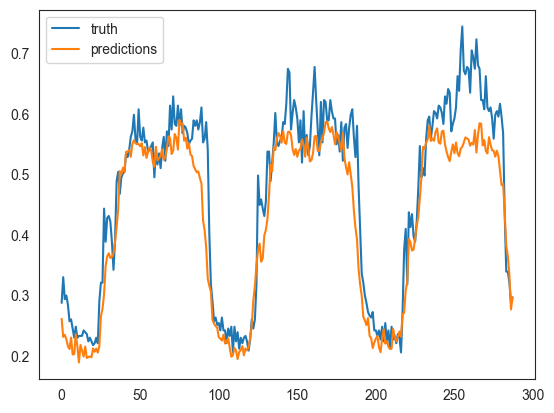

In [144]:
# Plot the historical data and the predictions
plt.plot(y_test_multi_output.iloc[0], label='truth')
plt.plot(lstm_predictions.iloc[0], label='predictions')
plt.legend()
plt.show()

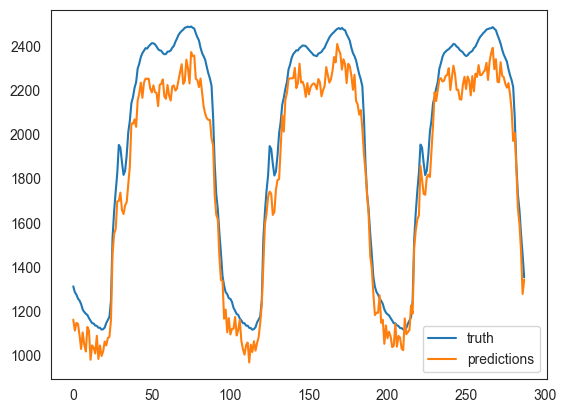

In [145]:
# Plot the historical data and the predictions
plt.plot(y_test_multi_output.sum(axis=0), label='truth')
plt.plot(lstm_predictions.sum(axis=0), label='predictions')
plt.legend()
plt.show()

based on the plot we can say that the predictions are pretty okay

In [146]:
X_trans = X.T
X_trans.shape

(151, 1536)

In [147]:
X_lstm = X_trans.values.reshape(X_trans.shape[0], 1, X_trans.shape[1])
X_lstm.shape

(151, 1, 1536)

In [148]:
lstm_predictions_lt =  lstm_model.predict(X_lstm)

5/5 [==============================] - 0s 999us/step


In [149]:
lstm_predictions_lt = lstm_predictions_lt.reshape((lstm_predictions_lt.shape[0], lstm_predictions_lt.shape[2]))

In [150]:
lstm_predictions_lt = pd.DataFrame(lstm_predictions_lt)

In [151]:
lstm_predictions_lt.shape

(151, 288)

In [152]:
lstm_predictions_lt.head()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,0.318132,0.315126,0.327154,0.386361,0.378374,0.357062,0.390096,0.390100,0.380768,0.435576,...,0.251140,0.224197,0.194973,0.220784,0.226981,0.220079,0.241731,0.272931,0.280089,0.324624
1,0.311669,0.262792,0.261497,0.253975,0.215572,0.163487,0.234026,0.220017,0.199130,0.210507,...,0.420626,0.436814,0.388382,0.435419,0.430990,0.450572,0.468187,0.454546,0.409669,0.408267
2,0.124280,0.129944,0.099347,0.104117,0.100690,0.135385,0.123911,0.115505,0.096571,0.144406,...,0.283147,0.228902,0.205610,0.192587,0.150546,0.089385,0.056242,0.105795,0.126726,0.161705
3,0.199283,0.192265,0.186502,0.199716,0.189972,0.196854,0.208441,0.204198,0.178855,0.225524,...,0.322766,0.281568,0.260967,0.278398,0.252374,0.205104,0.205511,0.219278,0.214668,0.234380
4,0.272219,0.252992,0.235600,0.227999,0.228713,0.213540,0.230017,0.220524,0.199901,0.231448,...,0.308136,0.317801,0.265606,0.295518,0.300252,0.274938,0.257470,0.297173,0.269965,0.297138


In [153]:
lstm_predictions_lt.min().min()

0.04029295

In [154]:
lstm_predictions_lt = smooth(lstm_predictions_lt)

In [155]:
lstm_predictions_lt.min().min()

0.04029295

In [156]:
X_lstm.shape

(151, 1, 1536)

In [157]:
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[2])
X_lstm.shape

(151, 1536)

In [158]:
X_lstm = pd.DataFrame(X_lstm)

In [159]:
total = pd.concat([X_lstm.iloc[:,-768:].reset_index(drop = True), lstm_predictions_lt.reset_index(drop = True)], axis = 1)

In [160]:
total

,768,769,770,771,772,773,774,775,776,777,...,278,279,280,281,282,283,284,285,286,287
0,0.286957,0.236957,0.295652,0.445652,0.476087,0.489130,0.476087,0.463043,0.443478,0.428261,...,0.251140,0.224197,0.194973,0.220784,0.226981,0.220079,0.241731,0.272931,0.280089,0.324624
1,0.471591,0.409091,0.352273,0.323864,0.352273,0.289773,0.335227,0.272727,0.295455,0.289773,...,0.420626,0.436814,0.388382,0.435419,0.430990,0.450572,0.468187,0.454546,0.409669,0.408267
2,0.166667,0.145833,0.166667,0.159722,0.152778,0.159722,0.159722,0.145833,0.159722,0.152778,...,0.283147,0.228902,0.205610,0.192587,0.150546,0.089385,0.056242,0.105795,0.126726,0.161705
3,0.223881,0.223881,0.223881,0.283582,0.228856,0.228856,0.223881,0.223881,0.228856,0.223881,...,0.322766,0.281568,0.260967,0.278398,0.252374,0.205104,0.205511,0.219278,0.214668,0.234380
4,0.277664,0.240779,0.227459,0.234631,0.219262,0.215164,0.220287,0.205943,0.201844,0.204918,...,0.308136,0.317801,0.265606,0.295518,0.300252,0.274938,0.257470,0.297173,0.269965,0.297138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.203205,0.183971,0.200434,0.192202,0.186715,0.181227,0.200434,0.186715,0.186715,0.192202,...,0.390532,0.355764,0.339751,0.309764,0.251980,0.203507,0.186549,0.179704,0.155524,0.169547
147,0.383292,0.405405,0.375921,0.385749,0.375921,0.407862,0.400491,0.393120,0.393120,0.388206,...,0.372370,0.366052,0.352109,0.366382,0.363213,0.345104,0.342400,0.327770,0.268276,0.279460
148,0.345216,0.319887,0.296435,0.259850,0.250469,0.214822,0.210131,0.210131,0.205441,0.205441,...,0.381639,0.387630,0.345881,0.360710,0.345424,0.333833,0.326280,0.323819,0.307452,0.314253
149,0.418336,0.411050,0.425622,0.404372,0.400729,0.282332,0.248937,0.237401,0.231937,0.229508,...,0.481424,0.484979,0.458917,0.516165,0.483819,0.514454,0.515263,0.458135,0.413670,0.408805


In [161]:
total_sum_row = total.sum(axis=0)
total_sum_row

768    49.600720
769    47.044007
770    45.033697
771    43.923768
772    43.068269
         ...    
283    52.331322
284    52.047009
285    49.510685
286    42.632904
287    44.560883
Length: 1056, dtype: float64

In [162]:
rng = range(1056)

In [163]:
import random
#Generate 5 random numbers between 0 and 150
randomlist = random.sample(range(0, 150), 5)
print(randomlist)

[34, 25, 28, 107, 76]


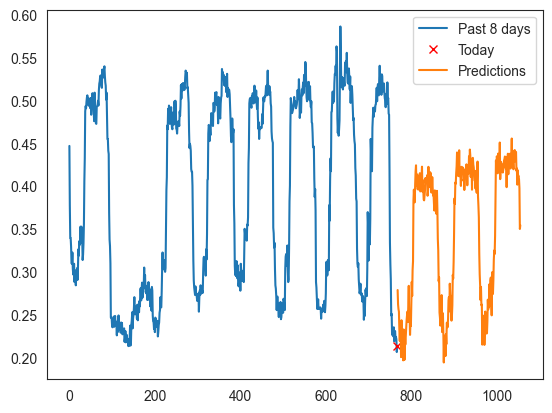

<Figure size 640x480 with 0 Axes>

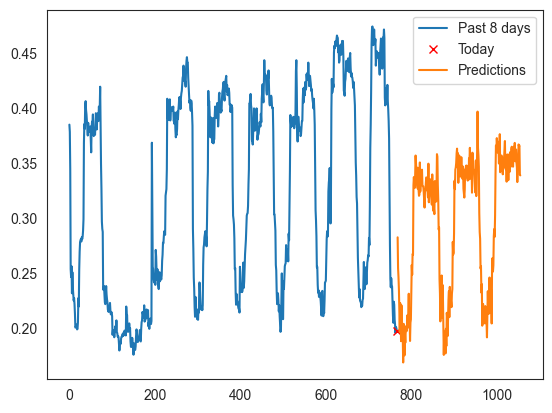

<Figure size 640x480 with 0 Axes>

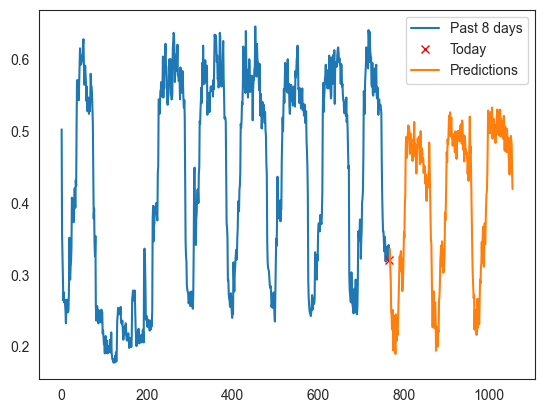

<Figure size 640x480 with 0 Axes>

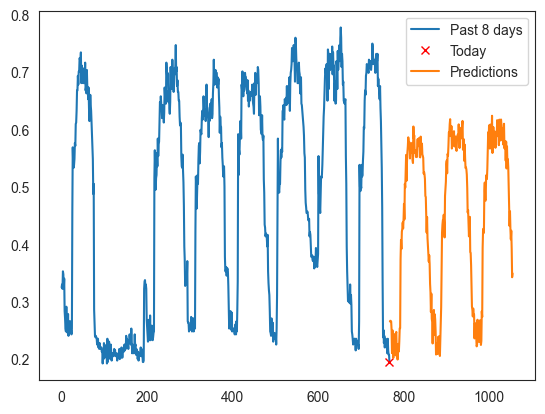

<Figure size 640x480 with 0 Axes>

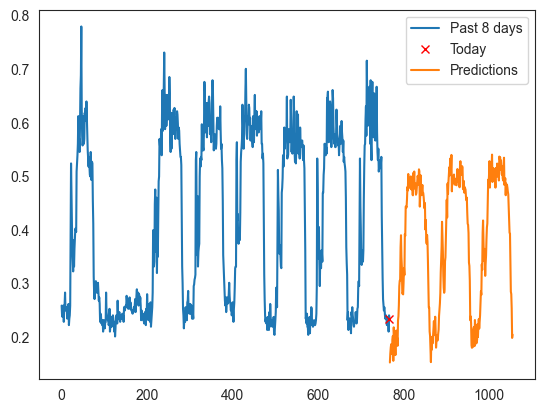

<Figure size 640x480 with 0 Axes>

In [164]:
for rand_int in randomlist:
    plt.plot(rng[:768], total.iloc[rand_int][:768], label= "Past 8 days")
    plt.plot(rng[767:768], total.iloc[rand_int][767:768], 'rx', label= "Today")
    plt.plot(rng[768:], total.iloc[rand_int][-288:], label='Predictions')
    plt.legend()
    plt.figure(rand_int)
    plt.show()

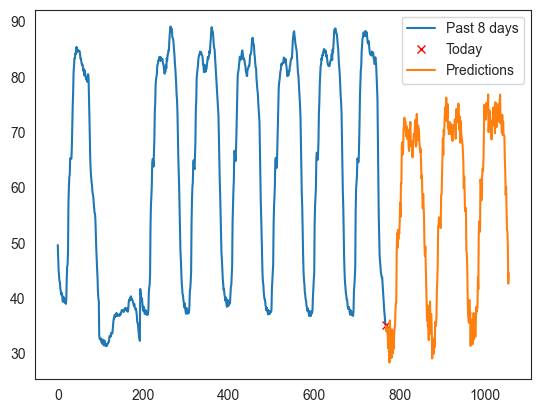

In [165]:
# Plot the historical data and the predictions (sum of clients' consumption)
plt.plot(rng[:768], total_sum_row[:768], label= "Past 8 days")
plt.plot(rng[767:768], total_sum_row[767:768], 'rx', label= "Today")
plt.plot(rng[768:], total_sum_row[-288:], label='Predictions')
plt.legend()
plt.show()

Based on the above we can asume that the total consumption will slightly decrease.

## Short term prediction

In [166]:
# Keeping only the data
st_data = target_cluster.iloc[:,:-10]
# transpose
st_data = st_data.T
names = st_data.columns
st_data.head()

,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.355646,0.240324,0.309800,0.417311,0.333077,...,0.238182,0.320538,0.240963,0.280899,0.343174,0.175739,0.351351,0.000000,0.000000,0.000000
1,0.354348,0.176136,0.298611,0.208955,0.577869,0.302551,0.211794,0.286806,0.410019,0.308976,...,0.230909,0.333148,0.243973,0.269663,0.327369,0.159249,0.373464,0.156660,0.196114,0.491718
2,0.306522,0.153409,0.298611,0.208955,0.577869,0.260118,0.232184,0.272113,0.417311,0.304118,...,0.223636,0.290247,0.249992,0.258427,0.327369,0.167481,0.351351,0.154784,0.271403,0.453384
3,0.500000,0.153409,0.215278,0.273632,0.616803,0.244152,0.224004,0.264766,0.410019,0.318597,...,0.225455,0.330626,0.243973,0.247191,0.351056,0.181227,0.353808,0.156660,0.307225,0.449598
4,0.510870,0.164773,0.243056,0.213930,0.615779,0.228240,0.219934,0.302454,0.424603,0.318597,...,0.229091,0.330626,0.256012,0.255618,0.347115,0.153762,0.351351,0.151032,0.305404,0.447705


(array([[1.6000e+01, 2.4500e+02, 1.1466e+04, ..., 3.4060e+03, 5.2900e+02,
         1.4200e+02],
        [8.6000e+01, 8.1210e+03, 1.9175e+04, ..., 8.0300e+02, 4.8000e+01,
         2.2000e+01],
        [3.7000e+01, 2.4256e+04, 1.7181e+04, ..., 7.5150e+03, 1.2230e+03,
         1.9500e+02],
        ...,
        [1.0600e+02, 1.7771e+04, 1.9226e+04, ..., 1.4130e+03, 2.5200e+02,
         6.7000e+01],
        [8.1000e+01, 7.2310e+03, 1.4214e+04, ..., 1.2800e+04, 5.6900e+02,
         5.0000e+01],
        [3.2000e+01, 8.0000e+00, 4.0000e+01, ..., 5.3780e+03, 1.0170e+03,
         2.0000e+01]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 151 BarContainer objects>)

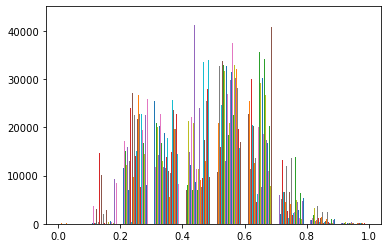

In [ ]:

plt.hist(st_data)

In [168]:
st_data.describe()


,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
count,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,...,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000
mean,0.450782,0.416856,0.434123,0.412891,0.479220,0.601471,0.482281,0.503433,0.575218,0.464101,...,0.506067,0.482046,0.502653,0.455743,0.546581,0.414549,0.444273,0.405356,0.493685,0.538030
std,0.125066,0.141954,0.213096,0.176229,0.162813,0.183578,0.155667,0.142341,0.144582,0.151389,...,0.160018,0.163468,0.164780,0.166763,0.146382,0.161008,0.156777,0.168547,0.180317,0.090390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.358696,0.289773,0.201389,0.218905,0.314549,0.445871,0.346221,0.361446,0.431967,0.318597,...,0.410909,0.315493,0.346396,0.280899,0.402333,0.241645,0.314496,0.222326,0.326047,0.469948
50%,0.443478,0.437500,0.506944,0.442786,0.517418,0.663502,0.530748,0.538422,0.610617,0.492399,...,0.494545,0.521022,0.537336,0.502809,0.596918,0.451325,0.459459,0.452158,0.525197,0.527212
75%,0.526087,0.528409,0.618056,0.552239,0.608607,0.743118,0.600138,0.622612,0.691556,0.574466,...,0.609091,0.601957,0.624891,0.575843,0.660177,0.520139,0.550369,0.546904,0.647845,0.587317
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Replacing everything above 1 with 1

st_data = np.clip(st_data, a_min = 0, a_max = 1)

(array([[1.6000e+01, 2.4500e+02, 1.1466e+04, ..., 3.4060e+03, 5.2900e+02,
         1.4200e+02],
        [8.6000e+01, 8.1210e+03, 1.9175e+04, ..., 8.0300e+02, 4.8000e+01,
         2.2000e+01],
        [3.7000e+01, 2.4256e+04, 1.7181e+04, ..., 7.5150e+03, 1.2230e+03,
         1.9500e+02],
        ...,
        [1.0600e+02, 1.7771e+04, 1.9226e+04, ..., 1.4130e+03, 2.5200e+02,
         6.7000e+01],
        [8.1000e+01, 7.2310e+03, 1.4214e+04, ..., 1.2800e+04, 5.6900e+02,
         5.0000e+01],
        [3.2000e+01, 8.0000e+00, 4.0000e+01, ..., 5.3780e+03, 1.0170e+03,
         2.0000e+01]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 151 BarContainer objects>)

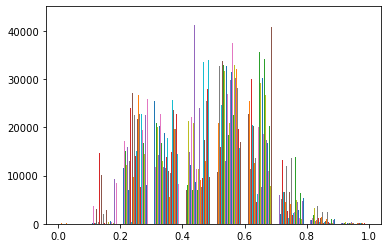

In [ ]:
plt.hist(st_data)

Hourly consumption

In [170]:
new_df = pd.concat([st_data.reset_index(drop = True), data.iloc[:,-7:].reset_index(drop = True)], axis = 1)
new_df['Time'] = new_df['Time'].astype(str)
new_df.head()


,90,125,134,136,138,165,167,168,170,171,...,344,352,368,Full Date,Time,Year,Day,Month,Day Name,Month Name
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.355646,0.240324,0.309800,0.417311,0.333077,...,0.000000,0.000000,0.000000,2012-01-01,00:00:00,2012,1,1,Sunday,January
1,0.354348,0.176136,0.298611,0.208955,0.577869,0.302551,0.211794,0.286806,0.410019,0.308976,...,0.156660,0.196114,0.491718,2012-01-01,00:15:00,2012,1,1,Sunday,January
2,0.306522,0.153409,0.298611,0.208955,0.577869,0.260118,0.232184,0.272113,0.417311,0.304118,...,0.154784,0.271403,0.453384,2012-01-01,00:30:00,2012,1,1,Sunday,January
3,0.500000,0.153409,0.215278,0.273632,0.616803,0.244152,0.224004,0.264766,0.410019,0.318597,...,0.156660,0.307225,0.449598,2012-01-01,00:45:00,2012,1,1,Sunday,January
4,0.510870,0.164773,0.243056,0.213930,0.615779,0.228240,0.219934,0.302454,0.424603,0.318597,...,0.151032,0.305404,0.447705,2012-01-01,01:00:00,2012,1,1,Sunday,January


In [171]:

new_hourly = new_df.groupby('Time').mean()
new_hourly = new_hourly.drop(columns=['Year', 'Day', 'Month'])

new_hourly

,90,125,134,136,138,165,167,168,170,171,...,324,325,326,327,328,329,330,344,352,368
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.323697,0.433964,0.203283,0.208542,0.402999,0.567927,0.382785,0.358285,0.397006,0.284783,...,0.389937,0.284347,0.297785,0.300075,0.402563,0.233779,0.254351,0.401316,0.405986,0.537229
00:15:00,0.314087,0.385322,0.200331,0.208170,0.386200,0.589197,0.355778,0.363788,0.417022,0.284316,...,0.383132,0.286381,0.287366,0.283095,0.372354,0.227398,0.259010,0.385388,0.405317,0.535335
00:30:00,0.299879,0.341251,0.194951,0.207934,0.375122,0.501952,0.315782,0.360897,0.417281,0.295262,...,0.377054,0.273078,0.283484,0.283090,0.359106,0.226009,0.243109,0.363434,0.484507,0.523062
00:45:00,0.401363,0.327814,0.190072,0.209414,0.363209,0.427975,0.295821,0.353767,0.401437,0.301771,...,0.373663,0.286712,0.296123,0.278167,0.355369,0.224088,0.248801,0.277586,0.528854,0.516717
01:00:00,0.422029,0.323231,0.186892,0.209781,0.351713,0.376747,0.286674,0.352662,0.391405,0.297088,...,0.383764,0.279127,0.291038,0.272334,0.351805,0.218470,0.251448,0.249860,0.530928,0.511167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,0.333273,0.482550,0.267266,0.310764,0.453131,0.624948,0.400893,0.377238,0.411569,0.283113,...,0.441979,0.400547,0.537493,0.532024,0.536729,0.282390,0.443265,0.437947,0.601067,0.550281
23:00:00,0.332968,0.475168,0.238772,0.297563,0.444707,0.613224,0.395577,0.369505,0.405818,0.314097,...,0.436526,0.381073,0.525707,0.521834,0.508448,0.262520,0.443370,0.432650,0.595095,0.552721
23:15:00,0.329213,0.465049,0.220347,0.222687,0.433505,0.629395,0.404048,0.368621,0.406515,0.286207,...,0.409512,0.343589,0.496462,0.489456,0.466131,0.241748,0.411942,0.424858,0.485950,0.552512


In [172]:
new_hourly.sum(axis="columns")


Time
00:00:00    50.676465
00:15:00    48.925919
00:30:00    47.404029
00:45:00    46.634611
01:00:00    45.961492
              ...    
22:45:00    66.617255
23:00:00    64.185092
23:15:00    59.520868
23:30:00    55.215952
23:45:00    52.239631
Length: 96, dtype: float64

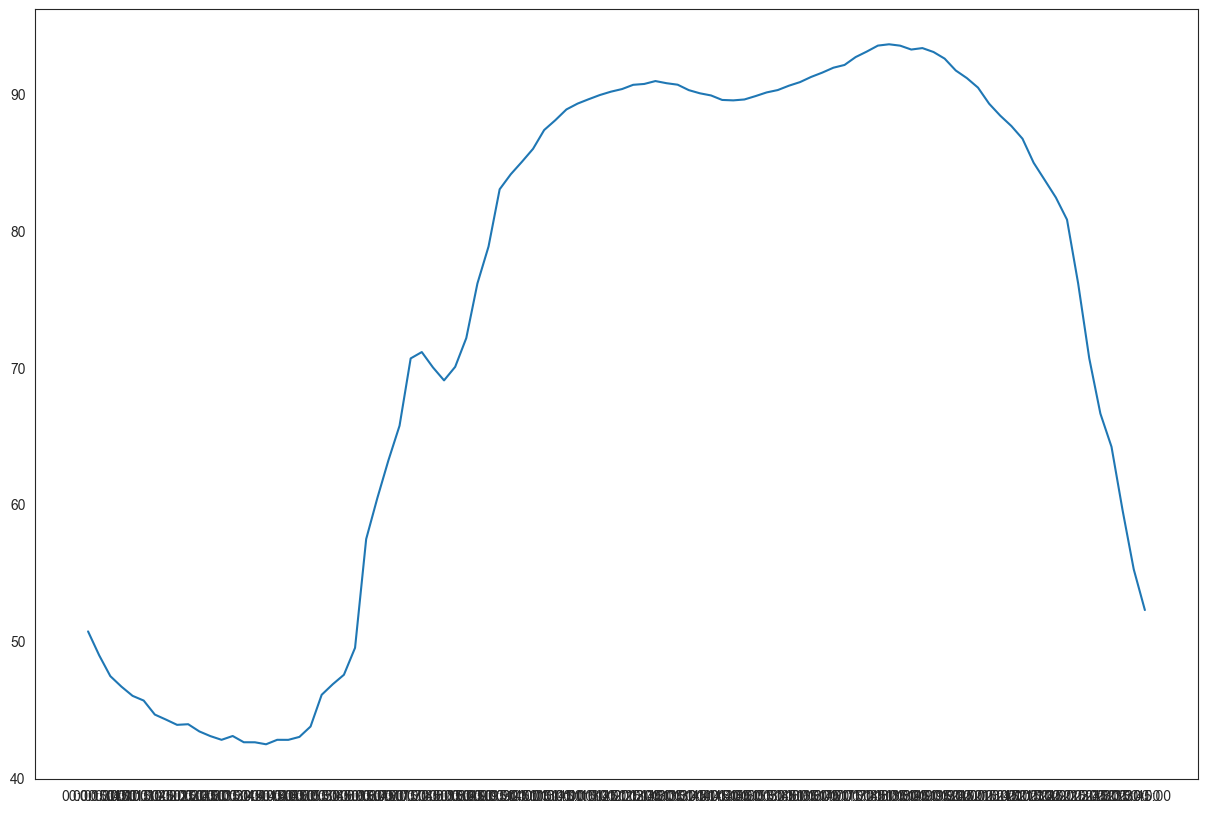

In [173]:
plt.figure(figsize=(15, 10))
plt.plot(new_hourly.sum(axis="columns"))

Data Augmnentation

In [310]:
st_data.shape

(105216, 151)

In [311]:
step = 274 # segment size, 68.5 hours

# divide time series using rolling windows
def divide_chunks(ts, w):
    chunks = []
    
    # looping till length ts minus the step,  with step w/2
    for i in range(0, len(ts) , int(w/2)):
        chunks.append(ts[i:i + w])
    
    return chunks

In [312]:
st_data_augmented = pd.DataFrame()
label_size = 12 # label size, 3 hours


def get_labels(ts_chunks, column_name):
    chunk_labels = []
    temp_names = []
    # calculate label for each chunk 
    for i in range(0, len(ts_chunks)-1):
        temp_names.append(column_name+'_segment_'+str(i))
        chunk_labels.append(np.sum(ts_chunks[i+1][137:149]))

    temp_names.append(column_name+'_segment_'+str(i+1))
    chunk_labels.append(0) # last value is set to 0 cause it doesn't exist
    temp_df = pd.DataFrame(ts_chunks, temp_names).T
    temp_labels_df = pd.DataFrame(chunk_labels, temp_names).T
    temp_df = pd.concat([temp_labels_df.reset_index(drop = True), temp_df.reset_index(drop = True)], axis = 0)

    return temp_df

for i in range(0,st_data.shape[1]):
    temp = divide_chunks(st_data.iloc[:,i].values, int(step))
    
    temp_df = get_labels(temp, str(st_data.columns[i]))
    st_data_augmented = pd.concat([st_data_augmented.reset_index(drop = True), temp_df.reset_index(drop = True)], axis = 1)

In [313]:
st_data_augmented.head()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_758,368_segment_759,368_segment_760,368_segment_761,368_segment_762,368_segment_763,368_segment_764,368_segment_765,368_segment_766,368_segment_767
0,3.771739,5.467391,6.558696,5.221739,7.323913,5.989130,6.702174,4.113043,5.239130,6.315217,...,5.761950,4.891150,6.745859,5.392806,6.088973,6.056318,5.150970,6.279224,0.000000,0.000000
1,0.000000,0.460870,0.286957,0.347826,0.669565,0.513043,0.608696,0.386957,0.515217,0.356522,...,0.577378,0.456223,0.461903,0.426408,0.561761,0.453384,0.445812,0.508755,0.429248,0.516327
2,0.354348,0.478261,0.304348,0.295652,0.654348,0.478261,0.582609,0.382609,0.545652,0.332609,...,0.572172,0.441552,0.470894,0.401325,0.570279,0.442972,0.477520,0.514434,0.418836,0.538571
3,0.306522,0.471739,0.297826,0.445652,0.613043,0.450000,0.578261,0.395652,0.530435,0.306522,...,0.587317,0.464742,0.474681,0.398486,0.560814,0.459536,0.456223,0.486039,0.419782,0.530052
4,0.500000,0.452174,0.284783,0.515217,0.610870,0.456522,0.621739,0.358696,0.545652,0.319565,...,0.581637,0.473734,0.489825,0.396593,0.566020,0.446758,0.465215,0.517274,0.424515,0.528159


In [314]:
st_data_augmented.tail()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_758,368_segment_759,368_segment_760,368_segment_761,368_segment_762,368_segment_763,368_segment_764,368_segment_765,368_segment_766,368_segment_767
270,0.330435,0.471739,0.678261,0.560870,0.536957,0.430435,0.543478,0.406522,0.304348,0.532609,...,0.550876,0.402272,0.571226,0.478940,0.426408,0.544250,0.431141,0.542830,0.421202,NaN
271,0.328261,0.460870,0.678261,0.508696,0.550000,0.371739,0.541304,0.426087,0.310870,0.515217,...,0.511122,0.421675,0.570279,0.469948,0.435873,0.550402,0.432560,0.537624,0.420256,NaN
272,0.310870,0.450000,0.663043,0.502174,0.647826,0.406522,0.476087,0.378261,0.373913,0.489130,...,0.485092,0.407004,0.543303,0.477520,0.458116,0.539991,0.430194,0.533838,0.432087,NaN
273,0.291304,0.467391,0.684783,0.502174,0.636957,0.415217,0.473913,0.354348,0.343478,0.493478,...,0.451964,0.397066,0.542357,0.477520,0.459536,0.517274,0.439186,0.527212,0.432560,NaN
274,0.284783,0.467391,0.684783,0.508696,0.647826,0.382609,0.513043,0.365217,0.345652,0.534783,...,0.453857,0.404165,0.563654,0.477993,0.456223,0.499290,0.451964,0.521060,0.417416,NaN


In [315]:

# we notice that the last column contain NaN values so we drop them
st_data_augmented.drop((list(st_data_augmented.filter(regex='segment_767'))), axis=1, inplace = True)

st_data_augmented.tail()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_757,368_segment_758,368_segment_759,368_segment_760,368_segment_761,368_segment_762,368_segment_763,368_segment_764,368_segment_765,368_segment_766
270,0.330435,0.471739,0.678261,0.560870,0.536957,0.430435,0.543478,0.406522,0.304348,0.532609,...,0.494084,0.550876,0.402272,0.571226,0.478940,0.426408,0.544250,0.431141,0.542830,0.421202
271,0.328261,0.460870,0.678261,0.508696,0.550000,0.371739,0.541304,0.426087,0.310870,0.515217,...,0.472788,0.511122,0.421675,0.570279,0.469948,0.435873,0.550402,0.432560,0.537624,0.420256
272,0.310870,0.450000,0.663043,0.502174,0.647826,0.406522,0.476087,0.378261,0.373913,0.489130,...,0.472788,0.485092,0.407004,0.543303,0.477520,0.458116,0.539991,0.430194,0.533838,0.432087
273,0.291304,0.467391,0.684783,0.502174,0.636957,0.415217,0.473913,0.354348,0.343478,0.493478,...,0.484146,0.451964,0.397066,0.542357,0.477520,0.459536,0.517274,0.439186,0.527212,0.432560
274,0.284783,0.467391,0.684783,0.508696,0.647826,0.382609,0.513043,0.365217,0.345652,0.534783,...,0.460956,0.453857,0.404165,0.563654,0.477993,0.456223,0.499290,0.451964,0.521060,0.417416


In [316]:
st_data_augmented.head()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_757,368_segment_758,368_segment_759,368_segment_760,368_segment_761,368_segment_762,368_segment_763,368_segment_764,368_segment_765,368_segment_766
0,3.771739,5.467391,6.558696,5.221739,7.323913,5.989130,6.702174,4.113043,5.239130,6.315217,...,5.435400,5.761950,4.891150,6.745859,5.392806,6.088973,6.056318,5.150970,6.279224,0.000000
1,0.000000,0.460870,0.286957,0.347826,0.669565,0.513043,0.608696,0.386957,0.515217,0.356522,...,0.470421,0.577378,0.456223,0.461903,0.426408,0.561761,0.453384,0.445812,0.508755,0.429248
2,0.354348,0.478261,0.304348,0.295652,0.654348,0.478261,0.582609,0.382609,0.545652,0.332609,...,0.467108,0.572172,0.441552,0.470894,0.401325,0.570279,0.442972,0.477520,0.514434,0.418836
3,0.306522,0.471739,0.297826,0.445652,0.613043,0.450000,0.578261,0.395652,0.530435,0.306522,...,0.467582,0.587317,0.464742,0.474681,0.398486,0.560814,0.459536,0.456223,0.486039,0.419782
4,0.500000,0.452174,0.284783,0.515217,0.610870,0.456522,0.621739,0.358696,0.545652,0.319565,...,0.492664,0.581637,0.473734,0.489825,0.396593,0.566020,0.446758,0.465215,0.517274,0.424515


In [317]:
# we notice that the last column contain label is 0, this is what we want to predict
# we seperate it from the rest of the dataset
X = st_data_augmented.loc[:, list(st_data_augmented.filter(regex='segment_766'))] # keeping segment 766 which is the most recent consumption 
X

,90_segment_766,125_segment_766,134_segment_766,136_segment_766,138_segment_766,165_segment_766,167_segment_766,168_segment_766,170_segment_766,171_segment_766,...,324_segment_766,325_segment_766,326_segment_766,327_segment_766,328_segment_766,329_segment_766,330_segment_766,344_segment_766,352_segment_766,368_segment_766
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.245652,0.278409,0.131944,0.238806,0.195697,0.281335,0.232184,0.257420,0.300204,0.226284,...,0.245455,0.201922,0.195786,0.219101,0.280033,0.192202,0.201474,0.165103,0.304189,0.429248
2,0.241304,0.289773,0.125000,0.228856,0.195697,0.254761,0.260673,0.250000,0.300204,0.226284,...,0.334545,0.212010,0.186757,0.213483,0.264268,0.211436,0.184275,0.162289,0.294475,0.418836
3,0.245652,0.278409,0.131944,0.233831,0.193648,0.244152,0.240324,0.250000,0.300204,0.221474,...,0.300000,0.212010,0.198796,0.207865,0.264268,0.200434,0.184275,0.153846,0.291439,0.419782
4,0.280435,0.272727,0.131944,0.228856,0.203893,0.254761,0.248464,0.250000,0.292839,0.207043,...,0.243636,0.186764,0.195786,0.210674,0.256385,0.175739,0.201474,0.156660,0.255616,0.424515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.315217,0.142045,0.173611,0.378109,0.372951,0.265422,0.301412,0.346679,0.292839,0.269627,...,0.221818,0.199400,0.183717,0.193820,0.394451,0.161993,0.159705,0.206379,0.160291,0.421202
271,0.330435,0.153409,0.138889,0.278607,0.360656,0.244152,0.264743,0.272113,0.329444,0.240764,...,0.214545,0.227143,0.195786,0.207865,0.287916,0.159249,0.167076,0.190432,0.161506,0.420256
272,0.328261,0.130682,0.131944,0.223881,0.363730,0.302551,0.276993,0.295034,0.322153,0.235905,...,0.212727,0.164065,0.156629,0.196629,0.240580,0.172996,0.164619,0.193246,0.160899,0.432087
273,0.334783,0.125000,0.138889,0.218905,0.368852,0.265422,0.256603,0.295034,0.300204,0.235905,...,0.203636,0.171631,0.189767,0.185393,0.236639,0.151018,0.157248,0.188555,0.162720,0.432560


In [318]:
st_data_augmented.drop((list(st_data_augmented.filter(regex='segment_766'))), axis=1, inplace = True)
st_data_augmented.head()

,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,368_segment_756,368_segment_757,368_segment_758,368_segment_759,368_segment_760,368_segment_761,368_segment_762,368_segment_763,368_segment_764,368_segment_765
0,3.771739,5.467391,6.558696,5.221739,7.323913,5.989130,6.702174,4.113043,5.239130,6.315217,...,6.701846,5.435400,5.761950,4.891150,6.745859,5.392806,6.088973,6.056318,5.150970,6.279224
1,0.000000,0.460870,0.286957,0.347826,0.669565,0.513043,0.608696,0.386957,0.515217,0.356522,...,0.418363,0.470421,0.577378,0.456223,0.461903,0.426408,0.561761,0.453384,0.445812,0.508755
2,0.354348,0.478261,0.304348,0.295652,0.654348,0.478261,0.582609,0.382609,0.545652,0.332609,...,0.445338,0.467108,0.572172,0.441552,0.470894,0.401325,0.570279,0.442972,0.477520,0.514434
3,0.306522,0.471739,0.297826,0.445652,0.613043,0.450000,0.578261,0.395652,0.530435,0.306522,...,0.434453,0.467582,0.587317,0.464742,0.474681,0.398486,0.560814,0.459536,0.456223,0.486039
4,0.500000,0.452174,0.284783,0.515217,0.610870,0.456522,0.621739,0.358696,0.545652,0.319565,...,0.432560,0.492664,0.581637,0.473734,0.489825,0.396593,0.566020,0.446758,0.465215,0.517274


Split the data

In [319]:
# Splitting into train validation and test sets
test_size = math.floor(st_data_augmented.shape[1] * 0.2)
st_train_multi_output = st_data_augmented[st_data_augmented.columns[:(-test_size)]]
st_test_multi_output = st_data_augmented[st_data_augmented.columns[-test_size:]]

In [320]:
st_train_multi_output.head()


,90_segment_0,90_segment_1,90_segment_2,90_segment_3,90_segment_4,90_segment_5,90_segment_6,90_segment_7,90_segment_8,90_segment_9,...,300_segment_603,300_segment_604,300_segment_605,300_segment_606,300_segment_607,300_segment_608,300_segment_609,300_segment_610,300_segment_611,300_segment_612
0,3.771739,5.467391,6.558696,5.221739,7.323913,5.989130,6.702174,4.113043,5.239130,6.315217,...,6.320504,6.426854,4.260848,7.899888,2.969839,6.117009,2.997123,6.186870,6.505799,3.505133
1,0.000000,0.460870,0.286957,0.347826,0.669565,0.513043,0.608696,0.386957,0.515217,0.356522,...,0.662114,0.312146,0.470763,0.546710,0.242437,0.598341,0.248493,0.513309,0.272749,0.464706
2,0.354348,0.478261,0.304348,0.295652,0.654348,0.478261,0.582609,0.382609,0.545652,0.332609,...,0.662114,0.269721,0.498107,0.561881,0.221209,0.680344,0.272749,0.528480,0.284862,0.470763
3,0.306522,0.471739,0.297826,0.445652,0.613043,0.450000,0.578261,0.395652,0.530435,0.306522,...,0.628713,0.230324,0.488993,0.516337,0.248493,0.646943,0.233353,0.531508,0.254550,0.519365
4,0.500000,0.452174,0.284783,0.515217,0.610870,0.456522,0.621739,0.358696,0.545652,0.319565,...,0.595312,0.239409,0.537595,0.534567,0.254550,0.725918,0.254550,0.510250,0.257578,0.488993


In [321]:
st_test_multi_output.head()

,300_segment_613,300_segment_614,300_segment_615,300_segment_616,300_segment_617,300_segment_618,300_segment_619,300_segment_620,300_segment_621,300_segment_622,...,368_segment_756,368_segment_757,368_segment_758,368_segment_759,368_segment_760,368_segment_761,368_segment_762,368_segment_763,368_segment_764,368_segment_765
0,6.675893,2.772886,6.621203,4.609000,6.268903,6.411622,3.828301,6.706265,2.927414,6.739636,...,6.701846,5.435400,5.761950,4.891150,6.745859,5.392806,6.088973,6.056318,5.150970,6.279224
1,0.558853,0.200012,0.513309,0.236381,0.607455,0.561881,0.449505,0.552766,0.221209,0.516337,...,0.418363,0.470421,0.577378,0.456223,0.461903,0.426408,0.561761,0.453384,0.445812,0.508755
2,0.564940,0.200012,0.552766,0.227296,0.561881,0.528480,0.485964,0.525452,0.212125,0.492021,...,0.445338,0.467108,0.572172,0.441552,0.470894,0.401325,0.570279,0.442972,0.477520,0.514434
3,0.525452,0.196984,0.601369,0.236381,0.555825,0.580111,0.455592,0.534567,0.221209,0.549738,...,0.434453,0.467582,0.587317,0.464742,0.474681,0.398486,0.560814,0.459536,0.456223,0.486039
4,0.522393,0.236381,0.546710,0.230324,0.577083,0.479878,0.488993,0.564940,0.221209,0.519365,...,0.432560,0.492664,0.581637,0.473734,0.489825,0.396593,0.566020,0.446758,0.465215,0.517274


Creating X and y sets

In [322]:
# y set is the label (first 12) and the rest is the x set
y_train_multi_output = pd.DataFrame(st_train_multi_output.iloc[:label_size]).T
X_train_multi_output = pd.DataFrame(st_train_multi_output.iloc[label_size:]).T
#x and y sets for validation and test sets as well
y_test_multi_output = pd.DataFrame(st_test_multi_output.iloc[:label_size]).T
X_test_multi_output = pd.DataFrame(st_test_multi_output.iloc[label_size:]).T

In [187]:
y_train_multi_output.head()


,0,1,2,3,4,5,6,7,8,9,10,11
90_segment_0,3.771739,0.000000,0.354348,0.306522,0.500000,0.510870,0.493478,0.495652,0.500000,0.510870,0.482609,0.476087
90_segment_1,5.467391,0.460870,0.478261,0.471739,0.452174,0.452174,0.463043,0.460870,0.454348,0.443478,0.447826,0.565217
90_segment_2,6.558696,0.286957,0.304348,0.297826,0.284783,0.286957,0.278261,0.313043,0.289130,0.360870,0.369565,0.347826
90_segment_3,5.221739,0.347826,0.295652,0.445652,0.515217,0.491304,0.443478,0.513043,0.484783,0.536957,0.458696,0.467391
90_segment_4,7.323913,0.669565,0.654348,0.613043,0.610870,0.654348,0.608696,0.521739,0.519565,0.491304,0.447826,0.386957


In [188]:
X_train_multi_output.head()


,12,13,14,15,16,17,18,19,20,21,...,265,266,267,268,269,270,271,272,273,274
90_segment_0,0.471739,0.426087,0.430435,0.436957,0.413043,0.400000,0.373913,0.413043,0.400000,0.371739,...,0.556522,0.456522,0.389130,0.389130,0.373913,0.330435,0.328261,0.310870,0.291304,0.284783
90_segment_1,0.600000,0.567391,0.571739,0.565217,0.552174,0.547826,0.528261,0.558696,0.565217,0.532609,...,0.519565,0.526087,0.500000,0.508696,0.517391,0.471739,0.460870,0.450000,0.467391,0.467391
90_segment_2,0.352174,0.360870,0.332609,0.350000,0.308696,0.360870,0.510870,0.539130,0.541304,0.523913,...,0.589130,0.636957,0.652174,0.619565,0.647826,0.678261,0.678261,0.663043,0.684783,0.684783
90_segment_3,0.467391,0.454348,0.458696,0.497826,0.517391,0.491304,0.478261,0.523913,0.502174,0.521739,...,0.536957,0.543478,0.495652,0.517391,0.519565,0.560870,0.508696,0.502174,0.502174,0.508696
90_segment_4,0.380435,0.360870,0.328261,0.354348,0.323913,0.295652,0.282609,0.295652,0.300000,0.276087,...,0.560870,0.556522,0.578261,0.582609,0.541304,0.536957,0.550000,0.647826,0.636957,0.647826


Train linear regression

In [189]:
st_regression = LinearRegression(positive=False)
st_regression.fit(X_train_multi_output, y_train_multi_output)
st_regression_pred = st_regression.predict(X_test_multi_output)
st_regression_r2_score = r2_score(y_test_multi_output, st_regression_pred)
st_regression_rmse_score = math.sqrt(mean_squared_error(y_test_multi_output, st_regression_pred))
print(st_regression_r2_score)
print(st_regression_rmse_score)

0.941423721067045
0.09510888247855177


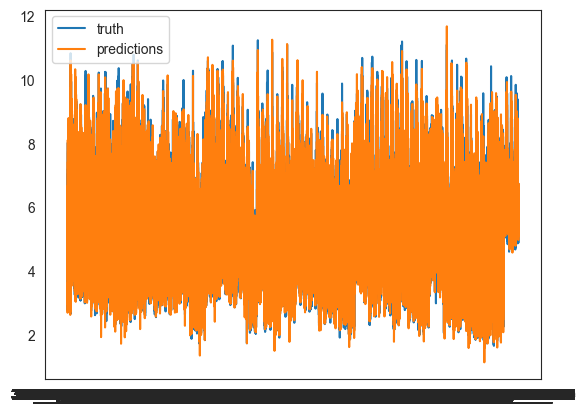

In [190]:
# Plot the historical data and the predictions
plt.plot(y_test_multi_output[0], label='truth')
plt.plot(st_regression_pred[:,0], label='predictions')
plt.legend()
plt.show()

Predicting the consumption for the next 3 days per 15 minutes

In [191]:
X = X.iloc[label_size:]
X

,90_segment_766,125_segment_766,134_segment_766,136_segment_766,138_segment_766,165_segment_766,167_segment_766,168_segment_766,170_segment_766,171_segment_766,...,324_segment_766,325_segment_766,326_segment_766,327_segment_766,328_segment_766,329_segment_766,330_segment_766,344_segment_766,352_segment_766,368_segment_766
12,0.319565,0.159091,0.145833,0.398010,0.221311,0.238848,0.428676,0.376212,0.519834,0.439292,...,0.265455,0.333148,0.340376,0.210674,0.481200,0.233386,0.277641,0.178236,0.230723,0.455277
13,0.295652,0.187500,0.152778,0.293532,0.237705,0.222935,0.395100,0.368792,0.475864,0.400664,...,0.370909,0.470428,0.367464,0.205056,0.331310,0.255364,0.275184,0.188555,0.231937,0.436346
14,0.273913,0.238636,0.152778,0.298507,0.245902,0.222935,0.428676,0.523729,0.475864,0.381374,...,0.425455,0.381119,0.389436,0.199438,0.299779,0.271854,0.250614,0.186679,0.248937,0.448651
15,0.300000,0.198864,0.208333,0.393035,0.299180,0.207023,0.547068,0.696738,0.446624,0.357225,...,0.380000,0.465384,0.473950,0.266854,0.311603,0.269083,0.250614,0.193246,0.258045,0.450071
16,0.373913,0.210227,0.590278,0.432836,0.327869,0.509574,0.624639,0.659712,0.563730,0.333077,...,0.390909,0.414790,0.449812,0.379213,0.445728,0.404544,0.375921,0.199812,0.190650,0.467582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.315217,0.142045,0.173611,0.378109,0.372951,0.265422,0.301412,0.346679,0.292839,0.269627,...,0.221818,0.199400,0.183717,0.193820,0.394451,0.161993,0.159705,0.206379,0.160291,0.421202
271,0.330435,0.153409,0.138889,0.278607,0.360656,0.244152,0.264743,0.272113,0.329444,0.240764,...,0.214545,0.227143,0.195786,0.207865,0.287916,0.159249,0.167076,0.190432,0.161506,0.420256
272,0.328261,0.130682,0.131944,0.223881,0.363730,0.302551,0.276993,0.295034,0.322153,0.235905,...,0.212727,0.164065,0.156629,0.196629,0.240580,0.172996,0.164619,0.193246,0.160899,0.432087
273,0.334783,0.125000,0.138889,0.218905,0.368852,0.265422,0.256603,0.295034,0.300204,0.235905,...,0.203636,0.171631,0.189767,0.185393,0.236639,0.151018,0.157248,0.188555,0.162720,0.432560


In [192]:
y_train_mo_new = pd.DataFrame(st_data_augmented.iloc[:label_size]).T
X_train_mo_new = pd.DataFrame(st_data_augmented.iloc[label_size:]).T

In [193]:
X_train_mo_new.shape

(115666, 263)

In [194]:
y_train_mo_new.shape

(115666, 12)

In [195]:
st_regression.fit(X_train_mo_new, y_train_mo_new)
predictions = st_regression.predict(X.T)

In [196]:
final_pred = pd.DataFrame()
final_pred = pd.DataFrame(predictions.T, columns = X.columns)
final_pred.head()

,90_segment_766,125_segment_766,134_segment_766,136_segment_766,138_segment_766,165_segment_766,167_segment_766,168_segment_766,170_segment_766,171_segment_766,...,324_segment_766,325_segment_766,326_segment_766,327_segment_766,328_segment_766,329_segment_766,330_segment_766,344_segment_766,352_segment_766,368_segment_766
0,5.249037,1.328578,1.292386,2.449887,3.323995,2.496442,2.490666,3.082971,3.287032,2.705877,...,2.314028,1.839471,0.859582,1.201392,3.060723,1.718758,1.433742,1.700329,2.103649,5.274780
1,0.428890,0.259583,0.151595,0.249834,0.183064,0.243700,0.246934,0.257548,0.306531,0.232881,...,0.235463,0.195423,0.196611,0.185194,0.234536,0.168041,0.193597,0.183666,0.288925,0.457780
2,0.422601,0.268177,0.142388,0.252528,0.178705,0.229716,0.248414,0.249095,0.303600,0.237962,...,0.287564,0.192058,0.212105,0.184809,0.242220,0.181679,0.187430,0.177803,0.287712,0.452963
3,0.414169,0.261256,0.146599,0.257012,0.187260,0.218171,0.252891,0.262087,0.308321,0.233672,...,0.275475,0.196329,0.202197,0.185196,0.255070,0.183689,0.186916,0.174795,0.286877,0.449627
4,0.403311,0.252760,0.139677,0.266099,0.190493,0.235348,0.246204,0.252825,0.306305,0.222462,...,0.242304,0.199506,0.208910,0.183443,0.248113,0.170666,0.195084,0.174788,0.262488,0.459273


In [197]:
final_pred_total = pd.concat([final_pred.reset_index(drop = True), data.iloc[:,-7:].reset_index(drop = True)], axis = 1)
final_pred_total = final_pred_total[:label_size]
final_pred_total.head()

,90_segment_766,125_segment_766,134_segment_766,136_segment_766,138_segment_766,165_segment_766,167_segment_766,168_segment_766,170_segment_766,171_segment_766,...,344_segment_766,352_segment_766,368_segment_766,Full Date,Time,Year,Day,Month,Day Name,Month Name
0,5.249037,1.328578,1.292386,2.449887,3.323995,2.496442,2.490666,3.082971,3.287032,2.705877,...,1.700329,2.103649,5.274780,2012-01-01,00:00:00,2012,1,1,Sunday,January
1,0.428890,0.259583,0.151595,0.249834,0.183064,0.243700,0.246934,0.257548,0.306531,0.232881,...,0.183666,0.288925,0.457780,2012-01-01,00:15:00,2012,1,1,Sunday,January
2,0.422601,0.268177,0.142388,0.252528,0.178705,0.229716,0.248414,0.249095,0.303600,0.237962,...,0.177803,0.287712,0.452963,2012-01-01,00:30:00,2012,1,1,Sunday,January
3,0.414169,0.261256,0.146599,0.257012,0.187260,0.218171,0.252891,0.262087,0.308321,0.233672,...,0.174795,0.286877,0.449627,2012-01-01,00:45:00,2012,1,1,Sunday,January
4,0.403311,0.252760,0.139677,0.266099,0.190493,0.235348,0.246204,0.252825,0.306305,0.222462,...,0.174788,0.262488,0.459273,2012-01-01,01:00:00,2012,1,1,Sunday,January


Deep Neural Network approach - LSTM

In [323]:
X_train_multi_output.shape

(92533, 263)

In [324]:

X_test_multi_output.shape

(23133, 263)

In [325]:
y_train_multi_output.shape

(92533, 12)

In [326]:
y_test_multi_output.shape

(23133, 12)

In [327]:
X_train_lstm = X_train_multi_output.values.reshape((X_train_multi_output.shape[0], 1, X_train_multi_output.shape[1]))
y_train_lstm = y_train_multi_output.values.reshape((y_train_multi_output.shape[0], 1, y_train_multi_output.shape[1]))

In [328]:
X_test_lstm = X_test_multi_output.values.reshape((X_test_multi_output.shape[0], 1, X_test_multi_output.shape[1]))


In [329]:

print(X_train_lstm.shape, X_test_lstm.shape, y_train_lstm.shape)

(92533, 1, 263) (23133, 1, 263) (92533, 1, 12)


In [330]:
# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(label_size, activation='linear'))

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 64)             83968     
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 32)             12416     
                                                                 
 dropout_3 (Dropout)         (None, 1, 32)             0         
                                                                 
 dense_3 (Dense)             (None, 1, 12)             396       
                                                                 
Total params: 96,780
Trainable params: 96,780
Non-trainable params: 0
_________________________________________________________________


In [331]:
# compile the model
lstm_model.compile(optimizer='adam', loss='mse')

In [332]:
# train the model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_batch_size=0.2)

Epoch 1/5
1446/1446 [==============================] - 11s 5ms/step - loss: 0.1919
Epoch 2/5
1446/1446 [==============================] - 7s 5ms/step - loss: 0.0509
Epoch 3/5
1446/1446 [==============================] - 8s 6ms/step - loss: 0.0456
Epoch 4/5
1446/1446 [==============================] - 8s 6ms/step - loss: 0.0411
Epoch 5/5
1446/1446 [==============================] - 8s 5ms/step - loss: 0.0374


In [333]:
lstm_predictions =  lstm_model.predict(X_test_lstm)

723/723 [==============================] - 3s 3ms/step


In [334]:
lstm_predictions.shape

(23133, 1, 12)

In [335]:
lstm_predictions = lstm_predictions.reshape(lstm_predictions.shape[0], lstm_predictions.shape[2])
lstm_predictions= pd.DataFrame(lstm_predictions)
lstm_predictions

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.740698,0.585619,0.584037,0.583352,0.585774,0.585557,0.580880,0.581797,0.579149,0.576794,0.571386,0.570159
1,2.772258,0.288011,0.296560,0.306967,0.317046,0.327321,0.337504,0.349090,0.360262,0.372450,0.382602,0.395868
2,6.625257,0.580120,0.579236,0.579151,0.582109,0.582428,0.578436,0.579882,0.577853,0.576082,0.571249,0.570452
3,4.507156,0.290397,0.279902,0.274062,0.270470,0.266790,0.261997,0.260282,0.259640,0.260146,0.260291,0.265594
4,6.204020,0.531355,0.529399,0.528755,0.530861,0.530842,0.527122,0.528341,0.526807,0.525594,0.521862,0.522131
...,...,...,...,...,...,...,...,...,...,...,...,...
23128,5.211749,0.427746,0.424813,0.424220,0.425764,0.426025,0.423842,0.425606,0.426017,0.427024,0.426304,0.429697
23129,5.533735,0.526084,0.530916,0.536171,0.543538,0.548550,0.550206,0.556305,0.559223,0.562251,0.562287,0.565593
23130,6.419616,0.488312,0.479135,0.472779,0.469624,0.464835,0.456578,0.453352,0.448433,0.444273,0.438289,0.437191
23131,5.151806,0.488683,0.493400,0.498886,0.506161,0.511460,0.513879,0.520330,0.524101,0.528054,0.529315,0.533823


In [336]:
lstm_predictions.min().min()

0.17883293

In [212]:
# ONLY RUN THIS IF LSTM PREDICTIONS MIN IS BELOW 0 
# replacing faulty values with previous value
for seg in range(0,lstm_predictions.shape[0]):
    for moment in range(0,lstm_predictions.shape[1]):
        if lstm_predictions.iloc[seg][moment] <= 0:
            lstm_predictions.iloc[seg][moment] = lstm_predictions.iloc[seg][moment-1]

In [340]:
# replacing faulty values with previous value
for seg in range(0,y_test_multi_output.shape[0]):
    for moment in range(0,y_test_multi_output.shape[1]):
        if y_test_multi_output.iloc[seg][moment] < 0.001:
            y_test_multi_output.iloc[seg][moment] = 0.001

In [342]:
lstm_rmse = math.sqrt(mean_squared_error(y_test_multi_output, lstm_predictions))
lstm_rmse

0.10366115284418011

In [343]:
lstm_r2_score = r2_score(y_test_multi_output, lstm_predictions)
lstm_r2_score

0.8801931033592564

In [341]:
mean_absolute_percentage_error(y_test_multi_output, lstm_predictions)

0.1354319765985183

In [217]:
y_test_multi_output

,0,1,2,3,4,5,6,7,8,9,10,11
300_segment_613,6.675893,0.558853,0.564940,0.525452,0.522393,0.552766,0.513309,0.531508,0.555825,0.543682,0.534567,0.561881
300_segment_614,2.772886,0.200012,0.200012,0.196984,0.236381,0.236381,0.233353,0.366684,0.431275,0.413076,0.339430,0.333343
300_segment_615,6.621203,0.513309,0.552766,0.601369,0.546710,0.567968,0.558853,0.552766,0.546710,0.543682,0.543682,0.580111
300_segment_616,4.609000,0.236381,0.227296,0.236381,0.230324,0.236381,0.233353,0.245465,0.221209,0.242437,0.215153,0.236381
300_segment_617,6.268903,0.607455,0.561881,0.555825,0.577083,0.552766,0.555825,0.537595,0.540623,0.546710,0.552766,0.495079
...,...,...,...,...,...,...,...,...,...,...,...,...
368_segment_761,5.392806,0.426408,0.401325,0.398486,0.396593,0.414576,0.393280,0.403691,0.425935,0.421675,0.419309,0.396593
368_segment_762,6.088973,0.561761,0.570279,0.560814,0.566020,0.564600,0.526739,0.560341,0.594889,0.568859,0.559867,0.551822
368_segment_763,6.056318,0.453384,0.442972,0.459536,0.446758,0.438239,0.450544,0.473734,0.449124,0.439186,0.439186,0.451964
368_segment_764,5.150970,0.445812,0.477520,0.456223,0.465215,0.489825,0.519167,0.525793,0.524846,0.524373,0.556555,0.547563


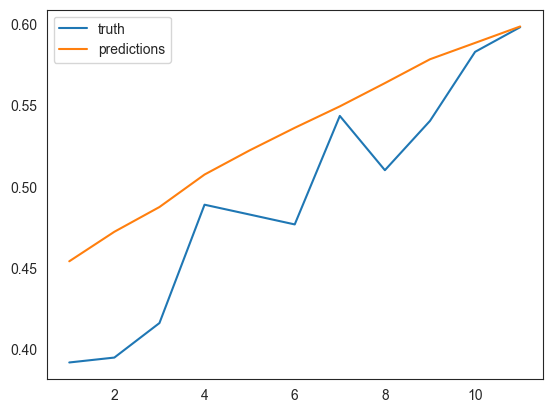

In [218]:
# Plot the historical data and the predictions
plt.plot(y_test_multi_output.iloc[27,1:], label='truth')
plt.plot(lstm_predictions.iloc[27,1:], label='predictions')
plt.legend()
plt.show()

In [219]:
X_trans = X.T
X_trans.shape

(151, 263)

In [220]:

X_lstm = X_trans.values.reshape(X_trans.shape[0], 1, X_trans.shape[1])
X_lstm.shape

(151, 1, 263)

In [221]:
lstm_predictions_st =  lstm_model.predict(X_lstm)

5/5 [==============================] - 0s 3ms/step


In [222]:
lstm_predictions_st = lstm_predictions_st.reshape(lstm_predictions_st.shape[0], lstm_predictions_st.shape[2])
lstm_predictions_st = pd.DataFrame(lstm_predictions_st)

In [223]:
lstm_predictions_st.shape

(151, 12)

In [224]:
lstm_predictions_st.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,5.279580,0.410367,0.409516,0.403907,0.406233,0.403749,0.401677,0.401032,0.403955,0.408853,0.408098,0.409237
1,2.061791,0.238373,0.250046,0.262117,0.275695,0.288301,0.301432,0.314124,0.329181,0.344505,0.357872,0.372704
2,2.214027,0.203852,0.210996,0.218462,0.227831,0.236714,0.246577,0.256520,0.269586,0.283286,0.295097,0.308930
3,2.705967,0.268737,0.277543,0.285774,0.296769,0.305981,0.315848,0.325742,0.338274,0.351443,0.361953,0.373973
4,3.351527,0.247806,0.248612,0.248038,0.251738,0.253669,0.256912,0.261093,0.268860,0.278029,0.284128,0.292529


In [225]:
lstm_predictions_st.min().min()

0.20107846

In [226]:
# ONLY RUN THIS IF LSTM PREDICTIONS MIN IS BELOW 0 
# replacing faulty values with previous value
for seg in range(0,lstm_predictions_st.shape[0]):
    for moment in range(0,lstm_predictions_st.shape[1]):
        if lstm_predictions_st.iloc[seg][moment] <= 0:
            lstm_predictions_st.iloc[seg][moment] = lstm_predictions.iloc[seg][moment-1]

In [227]:
lstm_predictions_st.min().min()

0.20107846

In [228]:
X_lstm.shape

(151, 1, 263)

In [229]:
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[2])
X_lstm.shape

(151, 263)

In [230]:
X_lstm = pd.DataFrame(X_lstm)
X_lstm

,0,1,2,3,4,5,6,7,8,9,...,253,254,255,256,257,258,259,260,261,262
0,0.319565,0.295652,0.273913,0.300000,0.373913,0.384783,0.382609,0.419565,0.406522,0.376087,...,0.356522,0.332609,0.308696,0.345652,0.332609,0.315217,0.330435,0.328261,0.334783,0.319565
1,0.159091,0.187500,0.238636,0.198864,0.210227,0.170455,0.204545,0.232955,0.232955,0.448864,...,0.136364,0.164773,0.159091,0.136364,0.170455,0.142045,0.153409,0.130682,0.125000,0.164773
2,0.145833,0.152778,0.152778,0.208333,0.590278,0.694444,0.652778,0.569444,0.562500,0.597222,...,0.375000,0.277778,0.236111,0.222222,0.201389,0.173611,0.138889,0.131944,0.138889,0.131944
3,0.398010,0.293532,0.298507,0.393035,0.432836,0.447761,0.447761,0.437811,0.447761,0.467662,...,0.283582,0.283582,0.283582,0.283582,0.283582,0.378109,0.278607,0.223881,0.218905,0.213930
4,0.221311,0.237705,0.245902,0.299180,0.327869,0.344262,0.337090,0.334016,0.331967,0.330943,...,0.366803,0.371926,0.379098,0.373975,0.360656,0.372951,0.360656,0.363730,0.368852,0.361680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.233386,0.255364,0.271854,0.269083,0.404544,0.451325,0.412803,0.334989,0.313038,0.291061,...,0.178483,0.194946,0.192202,0.175739,0.161993,0.161993,0.159249,0.172996,0.151018,0.161993
147,0.277641,0.275184,0.250614,0.250614,0.375921,0.378378,0.373464,0.417690,0.378378,0.383292,...,0.171990,0.169533,0.169533,0.164619,0.169533,0.159705,0.167076,0.164619,0.157248,0.157248
148,0.178236,0.188555,0.186679,0.193246,0.199812,0.203565,0.213884,0.217636,0.234522,0.235460,...,0.208255,0.207317,0.208255,0.203565,0.202627,0.206379,0.190432,0.193246,0.188555,0.188555
149,0.230723,0.231937,0.248937,0.258045,0.190650,0.183971,0.180328,0.185792,0.197936,0.200364,...,0.211293,0.186400,0.168792,0.165149,0.162720,0.160291,0.161506,0.160899,0.162720,0.148755


In [231]:
X_test_multi_output = pd.DataFrame(X_test_multi_output)

In [232]:
st_regression_pred = pd.DataFrame(st_regression_pred)

In [233]:
total = pd.concat([X_lstm.iloc[:,-137:].reset_index(drop = True), lstm_predictions_st.reset_index(drop = True)], axis = 1)

In [234]:
total

,126,127,128,129,130,131,132,133,134,135,...,2,3,4,5,6,7,8,9,10,11
0,0.489130,0.460870,0.460870,0.502174,0.536957,0.484783,0.519565,0.476087,0.491304,0.547826,...,0.409516,0.403907,0.406233,0.403749,0.401677,0.401032,0.403955,0.408853,0.408098,0.409237
1,0.528409,0.630682,0.613636,0.534091,0.602273,0.573864,0.528409,0.556818,0.551136,0.545455,...,0.250046,0.262117,0.275695,0.288301,0.301432,0.314124,0.329181,0.344505,0.357872,0.372704
2,0.562500,0.569444,0.576389,0.527778,0.541667,0.548611,0.548611,0.541667,0.527778,0.548611,...,0.210996,0.218462,0.227831,0.236714,0.246577,0.256520,0.269586,0.283286,0.295097,0.308930
3,0.462687,0.552239,0.507463,0.497512,0.592040,0.442786,0.472637,0.601990,0.467662,0.512438,...,0.277543,0.285774,0.296769,0.305981,0.315848,0.325742,0.338274,0.351443,0.361953,0.373973
4,0.393443,0.392418,0.386270,0.410861,0.389344,0.385246,0.392418,0.382172,0.368852,0.401639,...,0.248612,0.248038,0.251738,0.253669,0.256912,0.261093,0.268860,0.278029,0.284128,0.292529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.429320,0.440323,0.456840,0.443066,0.445810,0.443066,0.569665,0.580667,0.555891,0.569665,...,0.245745,0.256388,0.268829,0.280264,0.292328,0.304209,0.318626,0.333434,0.346201,0.360528
147,0.506143,0.515971,0.511057,0.466830,0.515971,0.454545,0.493857,0.479115,0.447174,0.508600,...,0.250443,0.263699,0.278231,0.291812,0.305895,0.319465,0.335222,0.351184,0.365265,0.380706
148,0.457786,0.472795,0.476548,0.481238,0.480300,0.481238,0.484053,0.483114,0.486867,0.500000,...,0.217110,0.224652,0.234142,0.243086,0.252960,0.262824,0.275720,0.289184,0.300772,0.314336
149,0.536126,0.535519,0.540376,0.537341,0.539162,0.541591,0.539769,0.544019,0.550091,0.542805,...,0.247774,0.256582,0.267546,0.277355,0.287966,0.298462,0.311577,0.325282,0.336779,0.349937


In [235]:
total_sum_row = total.sum(axis=0)
total_sum_row

126    82.728102
127    82.182206
128    82.025243
129    81.977916
130    81.908911
         ...    
7      49.885033
8      51.848267
9      53.902229
10     55.555969
11     57.436684
Length: 149, dtype: float64

predictions of lstm

In [236]:
rng = range(148)

In [237]:
rng

range(0, 148)

In [238]:
#Generate 5 random numbers between 0 and 150
randomlist = random.sample(range(0, 150), 5)
print(randomlist)

[26, 112, 65, 122, 75]


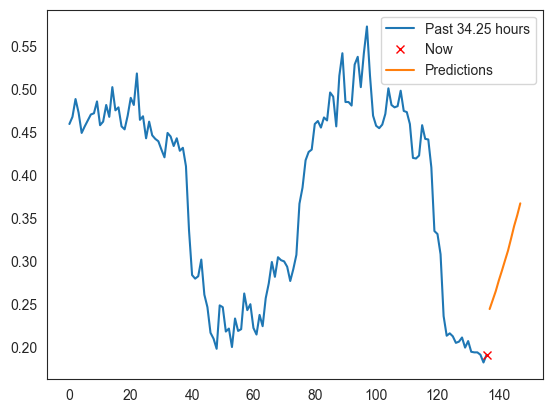

<Figure size 640x480 with 0 Axes>

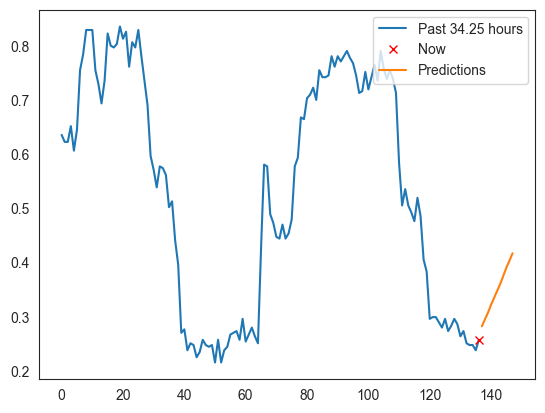

<Figure size 640x480 with 0 Axes>

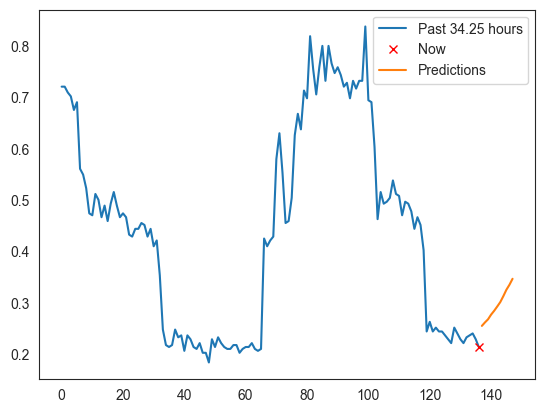

<Figure size 640x480 with 0 Axes>

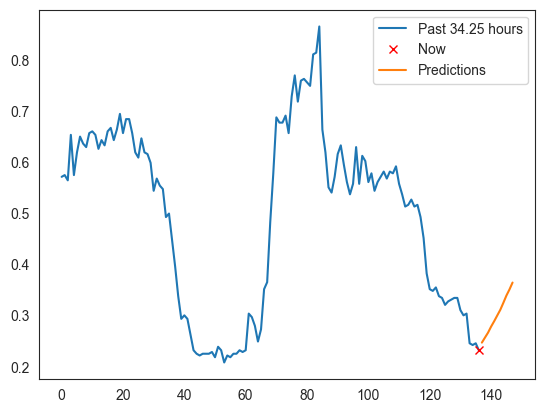

<Figure size 640x480 with 0 Axes>

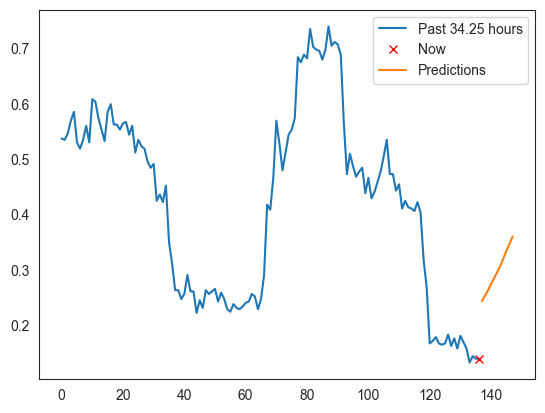

<Figure size 640x480 with 0 Axes>

In [239]:
for rand_int in randomlist:
    plt.plot(rng[:137], total.iloc[rand_int][:137], label= "Past 34.25 hours")
    plt.plot(rng[136:137], total.iloc[rand_int][136:137], 'rx', label= "Now")
    plt.plot(rng[137:], total.iloc[rand_int][-11:], label='Predictions')
    plt.legend()
    plt.figure(rand_int)
    plt.show()

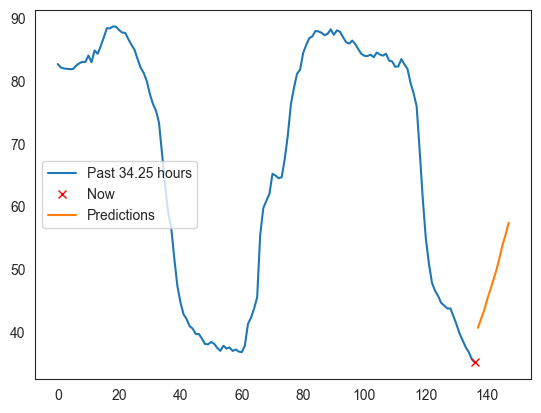

In [240]:
# Plot the historical data and the predictions (sum of clients' consumption)
plt.plot(rng[:137], total_sum_row[:137], label= "Past 34.25 hours")
plt.plot(rng[136:137], total_sum_row[136:137], 'rx', label= "Now")
plt.plot(rng[137:], total_sum_row[-11:], label='Predictions')
plt.legend()
plt.show()

predictions of linear regression

In [241]:
total = pd.concat([X_test_multi_output.iloc[:,-137:].reset_index(drop = True), st_regression_pred.reset_index(drop = True)], axis = 1)

In [242]:
total

,138,139,140,141,142,143,144,145,146,147,...,2,3,4,5,6,7,8,9,10,11
0,0.200012,0.200012,0.196984,0.236381,0.236381,0.233353,0.366684,0.431275,0.413076,0.339430,...,0.590402,0.568660,0.575264,0.571871,0.583247,0.585151,0.599011,0.580158,0.574419,0.560420
1,0.513309,0.552766,0.601369,0.546710,0.567968,0.558853,0.552766,0.546710,0.543682,0.543682,...,0.241172,0.243404,0.269445,0.304695,0.335582,0.389545,0.384305,0.385741,0.366950,0.358951
2,0.236381,0.227296,0.236381,0.230324,0.236381,0.233353,0.245465,0.221209,0.242437,0.215153,...,0.586687,0.612517,0.609567,0.595701,0.580054,0.575629,0.582599,0.580515,0.593599,0.602779
3,0.607455,0.561881,0.555825,0.577083,0.552766,0.555825,0.537595,0.540623,0.546710,0.552766,...,0.230758,0.238402,0.226836,0.238846,0.228651,0.239954,0.233180,0.236430,0.226196,0.223864
4,0.561881,0.528480,0.580111,0.479878,0.410017,0.336372,0.321231,0.300033,0.287890,0.272749,...,0.559143,0.557334,0.571676,0.566086,0.562414,0.536342,0.532413,0.514731,0.531618,0.522001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23128,0.561761,0.570279,0.560814,0.566020,0.564600,0.526739,0.560341,0.594889,0.568859,0.559867,...,0.422078,0.418468,0.417390,0.427670,0.415696,0.410080,0.429061,0.442591,0.440566,0.415670
23129,0.453384,0.442972,0.459536,0.446758,0.438239,0.450544,0.473734,0.449124,0.439186,0.439186,...,0.512970,0.518271,0.530362,0.530182,0.523799,0.536222,0.557591,0.559365,0.556570,0.555494
23130,0.445812,0.477520,0.456223,0.465215,0.489825,0.519167,0.525793,0.524846,0.524373,0.556555,...,0.469175,0.471952,0.467490,0.457652,0.462280,0.468389,0.462081,0.449802,0.452762,0.456203
23131,0.508755,0.514434,0.486039,0.517274,0.543303,0.528632,0.506389,0.499763,0.511595,0.484619,...,0.510225,0.507636,0.503453,0.517273,0.522518,0.521932,0.517503,0.528407,0.543549,0.545395


In [243]:
total_sum_row = total.sum(axis=0)
total_sum_row

138    11035.149214
139    11039.964873
140    11051.442516
141    11055.884386
142    11049.318874
           ...     
7      11053.007671
8      11056.606334
9      11050.088421
10     11045.196864
11     11048.654247
Length: 149, dtype: float64

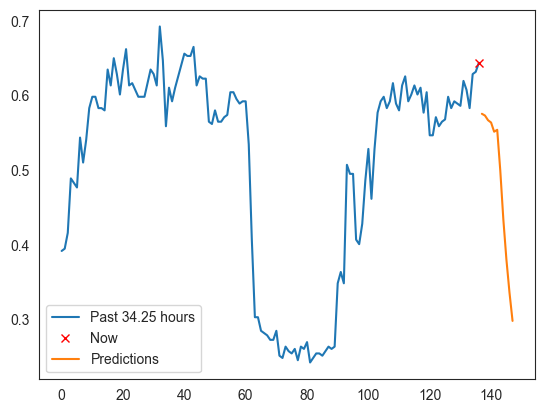

<Figure size 640x480 with 0 Axes>

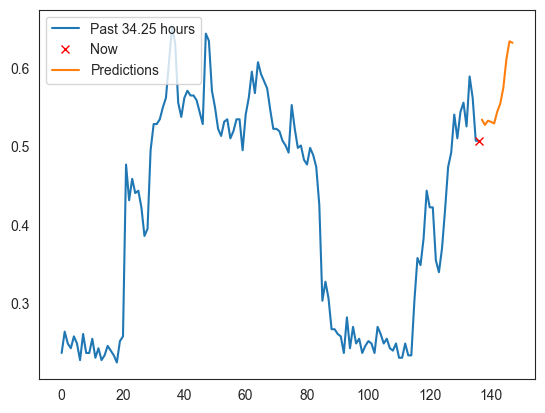

<Figure size 640x480 with 0 Axes>

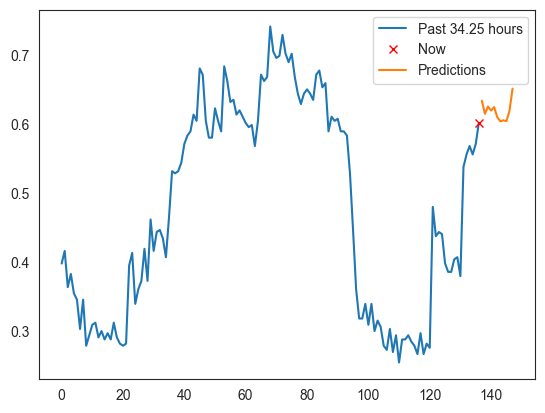

<Figure size 640x480 with 0 Axes>

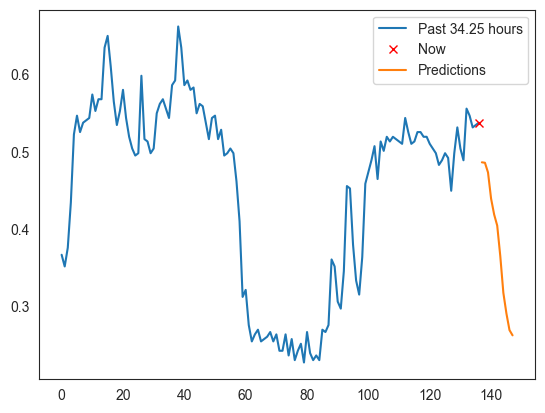

<Figure size 640x480 with 0 Axes>

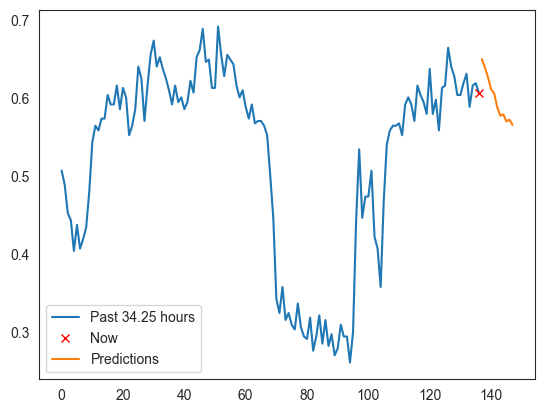

<Figure size 640x480 with 0 Axes>

In [244]:
for rand_int in randomlist:
    plt.plot(rng[:137], total.iloc[rand_int][:137], label= "Past 34.25 hours")
    plt.plot(rng[136:137], total.iloc[rand_int][136:137], 'rx', label= "Now")
    plt.plot(rng[137:], total.iloc[rand_int][-11:], label='Predictions')
    plt.legend()
    plt.figure(rand_int)
    plt.show()


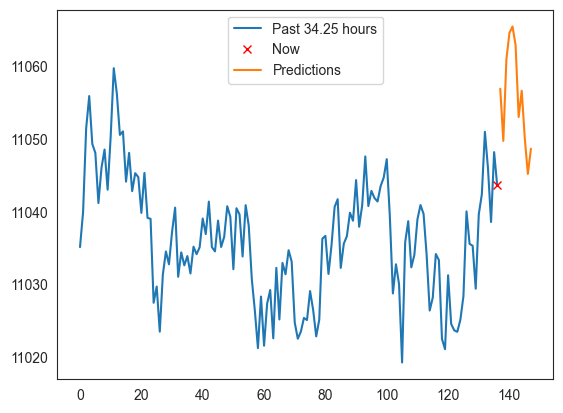

In [245]:
# Plot the historical data and the predictions (sum of clients' consumption)
plt.plot(rng[:137], total_sum_row[:137], label= "Past 34.25 hours")
plt.plot(rng[136:137], total_sum_row[136:137], 'rx', label= "Now")
plt.plot(rng[137:], total_sum_row[-11:], label='Predictions')
plt.legend()
plt.show()